# INSTALACION DE LIBRERIAS

In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install --extra-index-url https://pypi.nvidia.com cudf-cu12
!pip install cuml-cu12
!pip install faiss-cpu
!pip install hdbscan
!pip install torch
!pip install plotly
!pip install nbformat
!pip install ace-tools
!pip install category_encoders
!pip install imblearn
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of 

# IMPORTACIONES

In [ ]:
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import silhouette_score,classification_report, accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from category_encoders import CountEncoder
import gc
from imblearn.over_sampling import SMOTE,SMOTENC
import joblib
%load_ext cudf.pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from rich.console import Console
from rich.panel import Panel
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

The cudf.pandas extension is already loaded. To reload it, use:
  %reload_ext cudf.pandas


# VARIABLES GLOBALES

In [ ]:
console = Console()

# FUNCIONES PARA EL PROYECTO

In [ ]:
def analizar_dataframe(df):
    # Mostrar primeras 15 filas
    console.print(Panel("Primeras 15 filas", title="🔍 Análisis de Datos 🔍", expand=False))
    display(df.head(15))

    # Información del DataFrame
    console.print(Panel("Info de la tabla", title="🔍 Análisis de Datos 🔍", expand=False))
    df_info = df.info()

    # Validación de datos nulos
    console.print(Panel("Validación de existencia de datos null", title="🔍 Análisis de Datos 🔍", expand=False))
    display(df.isnull().sum())

    # Validación de datos duplicados
    console.print(Panel("Validación de datos duplicados", title="🔍 Análisis de Datos 🔍", expand=False))
    display(df[df.duplicated()])

    return df_info

# Funcion que imprime la cantidad de valores nulos (None o NaN), la cantidad de valores NaN
#    y los valores únicos de una columna específica de un DataFrame.
def check_nulls_and_unique_values(df, column_name):
    # Contar valores nulos (None y NaN)
    null_count = df[column_name].isnull().sum()

    # Contar valores NaN (isna() y isnull() funcionan igual para NaN)
    nan_count = df[column_name].isna().sum()

    # Obtener valores únicos de la columna
    unique_values = df[column_name].unique()

    # Mostrar resultados
    print(f"Valores nulos del campo '{column_name}' (None o NaN): {null_count}")
    print(f"Valores NaN del campo '{column_name}': {nan_count}")
    print(f"Valores únicos del campo '{column_name}': {unique_values}")

# Funcion para dividir el mes y año que tenga slash
def split_month_year_by_slash(df, source_col, month_col, year_col):
    # Dividir la columna en dos partes (mes y año)
    split_data = df[source_col].str.split('/', expand=True)

    # Asignar a las columnas nuevas
    df[month_col] = split_data[0].astype(int)
    df[year_col] = split_data[1].astype(int)

    return df

# Funcion para dividir en 2 columnas la hora y minuto
def split_hour_minute(df, col_to_split, new_hour_col, new_min_col):
    # Separar la columna en dos partes usando ':'
    df[new_hour_col] = df[col_to_split].str.split(':', expand=True)[0]
    df[new_min_col] = df[col_to_split].str.split(':', expand=True)[1]

    # Convertir a entero
    df[new_hour_col] = df[new_hour_col].astype(int)
    df[new_min_col] = df[new_min_col].astype(int)

    return df


# Función para limpiar valores nominales
def clean_nominal(value):
    if pd.isna(value):
        return "desconocido"
    value = value.strip()
    value = value.lower()
    value = re.sub(r'[^a-zA-Z\s]', '', value)
    return value

# Metodo para limpiar el signo de dolar y convertir a float un monto
def clean_amount(amount):
    return float(amount.replace("$", ""))

# ANALISIS DE DATASET

## LECTURA CSV

In [ ]:
# Lee el archivo CSV de usuarios
user_csv_dataframe = pd.read_csv('sd254_users.csv')

# Lee el archivo CSV de tarjetas
card_csv_dataframe = pd.read_csv('sd254_cards.csv')

# Lee el archivo CSV de transacciones
transactions_csv_dataframe = pd.read_csv('credit_card_transactions-ibm_v2.csv')

### ANÁLISIS DE CSV DE USUARIOS

In [ ]:
analizar_dataframe(user_csv_dataframe)


╭─ 🔍 Análisis de Datos 🔍 ─╮
│ Primeras 15 filas         │
╰───────────────────────────╯

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,<NA>,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,<NA>,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,<NA>,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,<NA>,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,<NA>,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1
5,Aldo Walker,42,70,1977,10,Male,58 Birch Lane,6,Davenport,IA,52803,41.55,-90.60,$20599,$41997,$0,704,3
6,Katalina Lewis,36,67,1983,12,Female,5695 Fifth Street,1,Louisville,KY,40299,38.22,-85.74,$25258,$51500,$102286,672,3
7,Ryland Howard,26,67,1993,12,Male,1941 Ninth Street,10,Portland,OR,97214,45.51,-122.64,$26790,$54623,$114711,728,1
8,Kenya Cooper,81,66,1938,7,Female,11 Spruce Avenue,<NA>,Telford,PA,18969,40.32,-75.32,$26273,$42509,$2895,755,5
9,Sawyer Butler,34,60,1986,1,Female,887 Grant Street,<NA>,Abbeville,LA,70510,29.97,-92.12,$18730,$38190,$81262,810,1


╭─ 🔍 Análisis de Datos 🔍 ─╮
│ Info de la tabla          │
╰───────────────────────────╯

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Person                       2000 non-null   object
 1   Current Age                  2000 non-null   int64
 2   Retirement Age               2000 non-null   int64
 3   Birth Year                   2000 non-null   int64
 4   Birth Month                  2000 non-null   int64
 5   Gender                       2000 non-null   object
 6   Address                      2000 non-null   object
 7   Apartment                    528 non-null    int64
 8   City                         2000 non-null   object
 9   State                        2000 non-null   object
 10  Zipcode                      2000 non-null   int64
 11  Latitude                     2000 non-null   float64
 12  Longitude                    2000 non-null   float64
 13  Per Capita Income - Zipcode  2000 non

╭─────── 🔍 Análisis de Datos 🔍 ────────╮
│ Validación de existencia de datos null │
╰────────────────────────────────────────╯

Person                            0
Current Age                       0
Retirement Age                    0
Birth Year                        0
Birth Month                       0
Gender                            0
Address                           0
Apartment                      1472
City                              0
State                             0
Zipcode                           0
Latitude                          0
Longitude                         0
Per Capita Income - Zipcode       0
Yearly Income - Person            0
Total Debt                        0
FICO Score                        0
Num Credit Cards                  0
dtype: int64

╭─── 🔍 Análisis de Datos 🔍 ────╮
│ Validación de datos duplicados │
╰────────────────────────────────╯

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards


En este caso, no existen datos duplicados, si existen datos nulos en la columna Apartment. Esta columna no es importante por lo que se la dejará de lado.

### ANÁLISIS DE CSV DE TARJETAS

In [ ]:
analizar_dataframe(card_csv_dataframe)

╭─ 🔍 Análisis de Datos 🔍 ─╮
│ Primeras 15 filas         │
╰───────────────────────────╯

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
5,1,0,Visa,Credit,4404898874682993,09/2003,736,YES,1,$27500,09/2003,2012,No
6,1,1,Visa,Debit,4001482973848631,07/2022,972,YES,2,$28508,02/2011,2011,No
7,1,2,Mastercard,Debit,5627220683410948,06/2022,48,YES,2,$9022,07/2003,2015,No
8,1,3,Mastercard,Debit (Prepaid),5711382187309326,11/2020,722,YES,2,$54,06/2010,2015,No
9,1,4,Mastercard,Debit (Prepaid),5766121508358701,02/2023,908,YES,1,$99,07/2006,2012,No


╭─ 🔍 Análisis de Datos 🔍 ─╮
│ Info de la tabla          │
╰───────────────────────────╯

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   User                   6146 non-null   int64
 1   CARD INDEX             6146 non-null   int64
 2   Card Brand             6146 non-null   object
 3   Card Type              6146 non-null   object
 4   Card Number            6146 non-null   int64
 5   Expires                6146 non-null   object
 6   CVV                    6146 non-null   int64
 7   Has Chip               6146 non-null   object
 8   Cards Issued           6146 non-null   int64
 9   Credit Limit           6146 non-null   object
 10  Acct Open Date         6146 non-null   object
 11  Year PIN last Changed  6146 non-null   int64
 12  Card on Dark Web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 683.3+ KB


╭─────── 🔍 Análisis de Datos 🔍 ────────╮
│ Validación de existencia de datos null │
╰────────────────────────────────────────╯

User                     0
CARD INDEX               0
Card Brand               0
Card Type                0
Card Number              0
Expires                  0
CVV                      0
Has Chip                 0
Cards Issued             0
Credit Limit             0
Acct Open Date           0
Year PIN last Changed    0
Card on Dark Web         0
dtype: int64

╭─── 🔍 Análisis de Datos 🔍 ────╮
│ Validación de datos duplicados │
╰────────────────────────────────╯

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web


In [ ]:
repeated_valuess = card_csv_dataframe['Card Number'].value_counts()
repeated_valuess = repeated_valuess[repeated_valuess > 1]  # Filtrar los que están repetidos

print(repeated_valuess)

Series([], Name: count, dtype: int64)


En este caso no existen datos null ni duplicados

### ANÁLISIS DE CSV DE TRANSACCIONES

In [ ]:
analizar_dataframe(transactions_csv_dataframe)

╭─ 🔍 Análisis de Datos 🔍 ─╮
│ Primeras 15 filas         │
╰───────────────────────────╯

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,<NA>,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,<NA>,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,<NA>,No
5,0,0,2002,9,3,13:53,$86.19,Swipe Transaction,-7146670748125200898,Monterey Park,CA,91755.0,5970,<NA>,No
6,0,0,2002,9,4,05:51,$93.84,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No
7,0,0,2002,9,4,06:09,$123.50,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No
8,0,0,2002,9,5,06:14,$61.72,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No
9,0,0,2002,9,5,09:35,$57.10,Swipe Transaction,4055257078481058705,La Verne,CA,91750.0,7538,<NA>,No


╭─ 🔍 Análisis de Datos 🔍 ─╮
│ Info de la tabla          │
╰───────────────────────────╯

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype
---  ------          -----
 0   User            int64
 1   Card            int64
 2   Year            int64
 3   Month           int64
 4   Day             int64
 5   Time            object
 6   Amount          object
 7   Use Chip        object
 8   Merchant Name   int64
 9   Merchant City   object
 10  Merchant State  object
 11  Zip             float64
 12  MCC             int64
 13  Errors?         object
 14  Is Fraud?       object
dtypes: float64(1), int64(7), object(7)
memory usage: 3.0+ GB


╭─────── 🔍 Análisis de Datos 🔍 ────────╮
│ Validación de existencia de datos null │
╰────────────────────────────────────────╯

User                     0
Card                     0
Year                     0
Month                    0
Day                      0
Time                     0
Amount                   0
Use Chip                 0
Merchant Name            0
Merchant City            0
Merchant State     2720821
Zip                2878135
MCC                      0
Errors?           23998469
Is Fraud?                0
dtype: int64

╭─── 🔍 Análisis de Datos 🔍 ────╮
│ Validación de datos duplicados │
╰────────────────────────────────╯

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
193878,13,0,2015,4,28,06:36,$100.00,Chip Transaction,-4282466774399734331,Boyne City,MI,49712.0,4829,Insufficient Balance,No
195221,13,1,2006,7,19,07:34,$100.00,Swipe Transaction,-4282466774399734331,Boyne City,MI,49712.0,4829,Insufficient Balance,No
195330,13,1,2006,10,15,07:11,$100.00,Swipe Transaction,-4282466774399734331,Boyne City,MI,49712.0,4829,Insufficient Balance,No
244172,17,2,2011,12,12,16:26,$120.00,Swipe Transaction,-4282466774399734331,Prescott Valley,AZ,86314.0,4829,Insufficient Balance,No
1360769,109,2,1999,12,9,04:16,$120.00,Swipe Transaction,-4282466774399734331,Hammond,IN,46323.0,4829,Insufficient Balance,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22993485,1886,0,2015,8,2,12:46,$90.00,Swipe Transaction,-1288082279022882052,Shohola,PA,18458.0,5499,<NA>,No
24006503,1963,0,2001,4,27,15:22,$120.00,Swipe Transaction,-4282466774399734331,Lakeland,FL,33810.0,4829,Insufficient Balance,No
24011580,1963,0,2005,1,30,15:08,$120.00,Swipe Transaction,-4282466774399734331,Lakeland,FL,33810.0,4829,Insufficient Balance,No
24015704,1963,0,2008,3,5,15:25,$120.00,Swipe Transaction,-4282466774399734331,Lakeland,FL,33810.0,4829,Insufficient Balance,No


Al parecer si existen transacciones repetidas, se limpiaran en la siguiente sección, sin embargo haremos una comprobación rapida realizando la búsqueda de una de estas filas

In [ ]:
display(transactions_csv_dataframe[
    (transactions_csv_dataframe['User'] == 13) &
    (transactions_csv_dataframe['Card'] == 0) &
    (transactions_csv_dataframe['Year'] == 2015) &
    (transactions_csv_dataframe['Month'] == 4) &
    (transactions_csv_dataframe['Day'] == 28) &
    (transactions_csv_dataframe['Amount'] == "$100.00")
    ])

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
193877,13,0,2015,4,28,06:36,$100.00,Chip Transaction,-4282466774399734331,Boyne City,MI,49712.0,4829,Insufficient Balance,No
193878,13,0,2015,4,28,06:36,$100.00,Chip Transaction,-4282466774399734331,Boyne City,MI,49712.0,4829,Insufficient Balance,No


Efectivamente si existen duplicados, se lo limpiará posteriormente

En el caso de los campos Merchant State y Zip, se investigará que caracteristicas tienen estos campos null

In [ ]:
display(transactions_csv_dataframe[transactions_csv_dataframe['Merchant State'].isnull()])

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
11,0,0,2002,9,5,20:41,$53.91,Online Transaction,-9092677072201095172,ONLINE,<NA>,<NA>,4900,<NA>,No
24,0,0,2002,9,9,20:02,$144.90,Online Transaction,-8338381919281017248,ONLINE,<NA>,<NA>,4899,<NA>,No
85,0,0,2002,9,30,06:21,$127.32,Online Transaction,-7421093378627544099,ONLINE,<NA>,<NA>,5311,<NA>,No
99,0,0,2002,10,6,06:14,$139.39,Online Transaction,-7421093378627544099,ONLINE,<NA>,<NA>,5311,<NA>,No
106,0,0,2002,10,9,08:16,$53.09,Online Transaction,-4956618006720593695,ONLINE,<NA>,<NA>,5193,<NA>,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386877,1999,1,2020,2,24,20:04,$55.79,Online Transaction,-6160036380778658394,ONLINE,<NA>,<NA>,4121,<NA>,No
24386879,1999,1,2020,2,25,07:06,$43.08,Online Transaction,-6160036380778658394,ONLINE,<NA>,<NA>,4121,<NA>,No
24386880,1999,1,2020,2,25,07:34,$43.76,Online Transaction,-6160036380778658394,ONLINE,<NA>,<NA>,4121,<NA>,No
24386884,1999,1,2020,2,26,07:43,$45.18,Online Transaction,-6160036380778658394,ONLINE,<NA>,<NA>,4121,<NA>,No


Tomando en cuenta todo esto, se considerarán las siguientes columnas para su procesamiento:

### Usuarios

| Person | Current Age | Gender | City | State |
|--------|------------|--------|------|-------|

### Tarjetas

| Card Brand | Card Type | Expires | Has Chip | Acct Open Date | Year PIN last Changed |
|------------|----------|---------|---------|----------------|-----------------------|

### Transacciones

| Year | Month | Day | Time | Amount | Use Chip | Merchant Name | Merchant City | Merchant State | MCC | Is Fraud? |
|------|-------|-----|------|--------|---------|--------------|--------------|---------------|-----|----------|

# LIMPIEZA Y VALIDACIÓN DE DATOS

## USUARIOS

Primero vamos a revisar los valores únicos y si existen valores NaN o Nulos.

### Columna de edad

In [ ]:
check_nulls_and_unique_values(user_csv_dataframe, 'Current Age')

Valores nulos del campo 'Current Age' (None o NaN): 0
Valores NaN del campo 'Current Age': 0
Valores únicos del campo 'Current Age': [ 53  81  63  43  42  36  26  34  27  29  18  48  41  54  76  22  66  28
  70  45  40  37  49  33  21  47  51  46  59  91  79  57  60  61  55  44
  82  90  30  23  65  87  58  25  32  64  52  75  62  56  35  24  19  20
  39  86  67  83  68  92  84  38  80  31  50  77  88 101  74  73  85  78
  72  69  71  89  98  93  94  99]


### Columna de género

In [ ]:
check_nulls_and_unique_values(user_csv_dataframe, 'Gender')


Valores nulos del campo 'Gender' (None o NaN): 0
Valores NaN del campo 'Gender': 0
Valores únicos del campo 'Gender': ['Female' 'Male']


### Columna de Ciudad

In [ ]:
check_nulls_and_unique_values(user_csv_dataframe, 'City')

Valores nulos del campo 'City' (None o NaN): 0
Valores NaN del campo 'City': 0
Valores únicos del campo 'City': ['La Verne' 'Little Neck' 'West Covina' ... 'Freeport' 'Elizabeth'
 'Merrimack']


### Columna de Estados

In [ ]:
check_nulls_and_unique_values(user_csv_dataframe, 'State')

Valores nulos del campo 'State' (None o NaN): 0
Valores NaN del campo 'State': 0
Valores únicos del campo 'State': ['CA' 'NY' 'IA' 'KY' 'OR' 'PA' 'LA' 'CO' 'RI' 'MI' 'TX' 'OK' 'AZ' 'NC'
 'GA' 'OH' 'AR' 'TN' 'FL' 'CT' 'AL' 'IL' 'MA' 'KS' 'MO' 'WI' 'SC' 'WV'
 'WA' 'UT' 'MD' 'NJ' 'MT' 'MN' 'IN' 'DE' 'ID' 'MS' 'NV' 'VT' 'VA' 'NH'
 'NM' 'ME' 'ND' 'AK' 'SD' 'HI' 'NE' 'DC' 'WY']


## TARJETAS

### Columna de Tipo de Tarjeta

In [ ]:
check_nulls_and_unique_values(card_csv_dataframe, 'Card Brand')

Valores nulos del campo 'Card Brand' (None o NaN): 0
Valores NaN del campo 'Card Brand': 0
Valores únicos del campo 'Card Brand': ['Visa' 'Mastercard' 'Discover' 'Amex']


### Columna de tipo de tarjeta

In [ ]:
check_nulls_and_unique_values(card_csv_dataframe, 'Card Type')

Valores nulos del campo 'Card Type' (None o NaN): 0
Valores NaN del campo 'Card Type': 0
Valores únicos del campo 'Card Type': ['Debit' 'Credit' 'Debit (Prepaid)']


### Columna de expiración

In [ ]:
check_nulls_and_unique_values(card_csv_dataframe, 'Expires')

Valores nulos del campo 'Expires' (None o NaN): 0
Valores NaN del campo 'Expires': 0
Valores únicos del campo 'Expires': ['12/2022' '12/2020' '02/2024' '08/2024' '03/2009' '09/2003' '07/2022'
 '06/2022' '11/2020' '02/2023' '03/2022' '07/2023' '02/2020' '06/2020'
 '06/2024' '05/2015' '01/2022' '09/2021' '07/2013' '11/2022' '04/2022'
 '12/2021' '05/2023' '01/2021' '02/2021' '01/2019' '07/2024' '07/2021'
 '06/2023' '12/2024' '01/2009' '06/2021' '03/2024' '03/2023' '11/2009'
 '08/2022' '09/2024' '02/2022' '12/2016' '04/2011' '10/2024' '08/2018'
 '07/2020' '10/2020' '01/2024' '03/2005' '01/2020' '08/2023' '04/2023'
 '05/2022' '11/2021' '11/2023' '10/2023' '03/2021' '09/2022' '10/2012'
 '05/2024' '04/2007' '02/2010' '03/2020' '10/2021' '05/2011' '01/2002'
 '09/2018' '07/2016' '04/2021' '07/2019' '11/2024' '05/2021' '12/2012'
 '09/2023' '12/2015' '09/2020' '08/2019' '08/2020' '12/2023' '05/2020'
 '04/2020' '11/2018' '08/2021' '10/2022' '10/2013' '07/2014' '04/2018'
 '05/2012' '04/2024' '06/20

En este caso, tenemos una fecha compuesta, lo recomendable es dividirlo en 2 partes (Año y Mes) para que sea el dato numérico

In [ ]:
split_month_year_by_slash(card_csv_dataframe,'Expires','ExpiresMonth', 'ExpiresYear')

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,ExpiresMonth,ExpiresYear,AcctOpenMonth,AcctOpenYear
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,12,2022,9,2002
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No,12,2020,4,2014
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No,2,2024,7,2003
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No,8,2024,1,2003
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No,3,2009,9,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No,1,2024,11,2000
6142,1997,2,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No,1,2021,4,2012
6143,1998,0,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No,8,2020,2,2012
6144,1999,0,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No,1,2020,1,2020


### Columna del flag para saber si tiene chip

In [ ]:
check_nulls_and_unique_values(card_csv_dataframe, 'Has Chip')

Valores nulos del campo 'Has Chip' (None o NaN): 0
Valores NaN del campo 'Has Chip': 0
Valores únicos del campo 'Has Chip': ['YES' 'NO']


### Columna de Fecha de apertura de la cuenta

In [ ]:
check_nulls_and_unique_values(card_csv_dataframe, 'Acct Open Date')

Valores nulos del campo 'Acct Open Date' (None o NaN): 0
Valores NaN del campo 'Acct Open Date': 0
Valores únicos del campo 'Acct Open Date': ['09/2002' '04/2014' '07/2003' '01/2003' '09/2008' '09/2003' '02/2011'
 '06/2010' '07/2006' '10/2009' '03/2002' '03/2019' '09/2009' '01/2011'
 '02/2007' '11/2010' '12/1999' '01/2002' '09/2007' '11/2005' '06/2005'
 '09/2010' '10/2014' '01/2020' '11/2009' '09/2017' '01/2005' '01/2012'
 '05/2012' '07/2009' '02/2020' '01/2007' '12/2008' '12/2012' '08/2007'
 '08/2016' '06/2002' '02/2002' '01/2008' '08/2013' '08/2003' '09/2016'
 '02/2004' '12/2009' '01/2006' '02/2000' '01/1998' '03/2009' '07/2002'
 '11/2014' '09/2001' '05/2005' '03/2012' '10/2006' '08/2008' '10/2010'
 '05/2010' '10/2016' '08/2005' '06/2008' '12/2003' '03/2006' '03/2005'
 '12/2006' '12/2017' '01/2014' '03/2001' '02/2009' '06/2007' '04/2008'
 '11/2003' '07/2012' '12/2016' '02/1999' '10/2013' '08/2011' '03/2013'
 '12/2010' '08/2014' '05/2004' '04/2005' '04/2010' '11/2012' '02/2003'
 '07/2

Al igual que la fecha anterior, se debe dividir esta columna en año y mes.

In [ ]:
split_month_year_by_slash(card_csv_dataframe,'Acct Open Date','AcctOpenMonth', 'AcctOpenYear')

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,ExpiresMonth,ExpiresYear,AcctOpenMonth,AcctOpenYear
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,12,2022,9,2002
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No,12,2020,4,2014
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No,2,2024,7,2003
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No,8,2024,1,2003
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No,3,2009,9,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No,1,2024,11,2000
6142,1997,2,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No,1,2021,4,2012
6143,1998,0,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No,8,2020,2,2012
6144,1999,0,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No,1,2020,1,2020


### Columna de la fecha del último año que se cambió el PIN

In [ ]:
check_nulls_and_unique_values(card_csv_dataframe, 'Year PIN last Changed')

Valores nulos del campo 'Year PIN last Changed' (None o NaN): 0
Valores NaN del campo 'Year PIN last Changed': 0
Valores únicos del campo 'Year PIN last Changed': [2008 2014 2004 2012 2009 2011 2015 2019 2007 2010 2020 2017 2016 2013
 2018 2006 2005 2003 2002]


## TRANSACCIONES

Primero limpiaremos todas las transacciones que estén duplicadas

In [ ]:
transactions_csv_dataframe = transactions_csv_dataframe.drop_duplicates()

### Columna Año (transacción)

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Year')

Valores nulos del campo 'Year' (None o NaN): 0
Valores NaN del campo 'Year': 0
Valores únicos del campo 'Year': [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 1999 2000 2001 1998 1996 1997 1995 1994 1991
 1992 1993]


### Columna Month (transacción)

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Month')

Valores nulos del campo 'Month' (None o NaN): 0
Valores NaN del campo 'Month': 0
Valores únicos del campo 'Month': [ 9 10 11 12  1  2  3  4  5  6  7  8]


### Columna Day (transacción)

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Day')

Valores nulos del campo 'Day' (None o NaN): 0
Valores NaN del campo 'Day': 0
Valores únicos del campo 'Day': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


### Columna Time (transacción)

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Time')

Valores nulos del campo 'Time' (None o NaN): 0
Valores NaN del campo 'Time': 0
Valores únicos del campo 'Time': ['06:21' '06:42' '06:22' ... '01:48' '00:33' '00:42']


En este caso, tenemos horas y minutos, se hará un proceso similar al de las fechas, es decir, dividirlo en hora y minutos.

In [ ]:
split_hour_minute(transactions_csv_dataframe,'Time','TimeHour','TimeMinute')

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,TimeHour,TimeMinute,AmountFloat,OnlineTransaction
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,<NA>,No,6,21,134.09,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No,6,42,38.48,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No,6,22,120.34,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,<NA>,No,17,45,128.95,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,<NA>,No,6,23,104.71,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,<NA>,No,22,23,-54.00,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,<NA>,No,22,24,54.00,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,<NA>,No,7,43,59.15,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,<NA>,No,20,10,43.12,No


### Columna Monto (transacción)

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Amount')

Valores nulos del campo 'Amount' (None o NaN): 0
Valores NaN del campo 'Amount': 0
Valores únicos del campo 'Amount': ['$134.09' '$38.48' '$120.34' ... '$588.73' '$1201.00' '$584.63']


En este caso, el monto tiene un simbolo de dolar, esto se lo quitará con python

In [ ]:
transactions_csv_dataframe["AmountFloat"] = transactions_csv_dataframe["Amount"].apply(clean_amount)

### Columna Use Chip (transacción)

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Use Chip')

Valores nulos del campo 'Use Chip' (None o NaN): 0
Valores NaN del campo 'Use Chip': 0
Valores únicos del campo 'Use Chip': ['Swipe Transaction' 'Online Transaction' 'Chip Transaction']


### Columna Nombre del comerciante

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Merchant Name')

Valores nulos del campo 'Merchant Name' (None o NaN): 0
Valores NaN del campo 'Merchant Name': 0
Valores únicos del campo 'Merchant Name': [ 3527213246127876953  -727612092139916043  3414527459579106770 ...
 -4348891722741102135  -642409450154660123 -3533580464561517260]


### Columna de Ciudad de comerciante

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Merchant City')

Valores nulos del campo 'Merchant City' (None o NaN): 0
Valores NaN del campo 'Merchant City': 0
Valores únicos del campo 'Merchant City': ['La Verne' 'Monterey Park' 'ONLINE' ... 'Alburgh' 'Buskirk' 'Mooers']


### Columna de Estado de comerciante

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Merchant State')

Valores nulos del campo 'Merchant State' (None o NaN): 2720821
Valores NaN del campo 'Merchant State': 2720821
Valores únicos del campo 'Merchant State': ['CA' None 'NE' 'IL' 'MO' 'Switzerland' 'IA' 'TX' 'Estonia' 'NJ' 'NV' 'NY'
 'Japan' 'AZ' 'UT' 'FL' 'MI' 'Mexico' 'WA' 'OH' 'Dominican Republic' 'NM'
 'China' 'SC' 'AK' 'PA' 'VA' 'Portugal' 'HI' 'CT' 'MA' 'MN' 'CO' 'Italy'
 'GA' 'Philippines' 'Jamaica' 'AR' 'Canada' 'OR' 'WI' 'NC' 'France' 'WV'
 'Norway' 'ME' 'NH' 'VT' 'MD' 'AL' 'KY' 'TN' 'MS' 'New Zealand'
 'Netherlands' 'KS' 'ND' 'DC' 'Sierra Leone' 'Haiti' 'MT' 'South Korea'
 'Spain' 'OK' 'Algeria' 'Egypt' 'WY' 'ID' 'Indonesia' 'RI'
 'United Kingdom' 'Colombia' 'South Africa' 'IN' 'The Bahamas' 'Singapore'
 'Pakistan' 'Malaysia' 'Mongolia' 'Israel' 'Hong Kong' 'Guatemala' 'Peru'
 'Thailand' 'Sweden' 'Taiwan' 'LA' 'Germany' 'Czech Republic' 'India'
 'Poland' 'DE' 'Costa Rica' 'Denmark' 'Bangladesh' 'Macedonia' 'Nigeria'
 'SD' 'Tuvalu' 'Ireland' 'Vatican City' 'Lithuania' 'Papua New G

Como se vió anteriormente, esta columna es nula. Los valores nulos contemplan varias filas, vamos a ver cuales son y que caracteristica tienen

In [ ]:
null_merchant_state_rows = transactions_csv_dataframe[transactions_csv_dataframe['Merchant State'].isnull()]
display(null_merchant_state_rows)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,TimeHour,TimeMinute,AmountFloat
11,0,0,2002,9,5,20:41,$53.91,Online Transaction,-9092677072201095172,ONLINE,<NA>,NaN,4900,<NA>,No,20,41,53.91
24,0,0,2002,9,9,20:02,$144.90,Online Transaction,-8338381919281017248,ONLINE,<NA>,NaN,4899,<NA>,No,20,2,144.90
85,0,0,2002,9,30,06:21,$127.32,Online Transaction,-7421093378627544099,ONLINE,<NA>,NaN,5311,<NA>,No,6,21,127.32
99,0,0,2002,10,6,06:14,$139.39,Online Transaction,-7421093378627544099,ONLINE,<NA>,NaN,5311,<NA>,No,6,14,139.39
106,0,0,2002,10,9,08:16,$53.09,Online Transaction,-4956618006720593695,ONLINE,<NA>,NaN,5193,<NA>,No,8,16,53.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386877,1999,1,2020,2,24,20:04,$55.79,Online Transaction,-6160036380778658394,ONLINE,<NA>,NaN,4121,<NA>,No,20,4,55.79
24386879,1999,1,2020,2,25,07:06,$43.08,Online Transaction,-6160036380778658394,ONLINE,<NA>,NaN,4121,<NA>,No,7,6,43.08
24386880,1999,1,2020,2,25,07:34,$43.76,Online Transaction,-6160036380778658394,ONLINE,<NA>,NaN,4121,<NA>,No,7,34,43.76
24386884,1999,1,2020,2,26,07:43,$45.18,Online Transaction,-6160036380778658394,ONLINE,<NA>,NaN,4121,<NA>,No,7,43,45.18


Parece ser que se trata de transacciones que son ONLINE (Merchant City tiene este valor), para ello, vamos a comprobar los valores unicos de la columna Mechant City a partir del filtro realizado.

In [ ]:
print(null_merchant_state_rows['Merchant City'].unique())

['ONLINE']


Como vimos, la columna Merchant City tiene como valor ONLINE cuando las transacciones son en linea, entonces, crearemos una columna que nos ayudará a identificar si una transacción es en linea o no

In [ ]:
transactions_csv_dataframe['OnlineTransaction'] = np.where(transactions_csv_dataframe['Merchant State'].isnull(), 'Yes', 'No')


In [ ]:
display(transactions_csv_dataframe)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,TimeHour,TimeMinute,AmountFloat,OnlineTransaction
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,<NA>,No,6,21,134.09,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No,6,42,38.48,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No,6,22,120.34,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,<NA>,No,17,45,128.95,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,<NA>,No,6,23,104.71,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,<NA>,No,22,23,-54.00,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,<NA>,No,22,24,54.00,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,<NA>,No,7,43,59.15,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,<NA>,No,20,10,43.12,No


Ahora, tambien agregaremos a Merchant State en lugar de null, el valor ONLINE

In [ ]:
transactions_csv_dataframe['Merchant State'] = transactions_csv_dataframe['Merchant State'].fillna('ONLINE')


Volveremos a comprobar los nulos y unicos

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Merchant State')

Valores nulos del campo 'Merchant State' (None o NaN): 0
Valores NaN del campo 'Merchant State': 0
Valores únicos del campo 'Merchant State': ['CA' 'ONLINE' 'NE' 'IL' 'MO' 'Switzerland' 'IA' 'TX' 'Estonia' 'NJ' 'NV'
 'NY' 'Japan' 'AZ' 'UT' 'FL' 'MI' 'Mexico' 'WA' 'OH' 'Dominican Republic'
 'NM' 'China' 'SC' 'AK' 'PA' 'VA' 'Portugal' 'HI' 'CT' 'MA' 'MN' 'CO'
 'Italy' 'GA' 'Philippines' 'Jamaica' 'AR' 'Canada' 'OR' 'WI' 'NC'
 'France' 'WV' 'Norway' 'ME' 'NH' 'VT' 'MD' 'AL' 'KY' 'TN' 'MS'
 'New Zealand' 'Netherlands' 'KS' 'ND' 'DC' 'Sierra Leone' 'Haiti' 'MT'
 'South Korea' 'Spain' 'OK' 'Algeria' 'Egypt' 'WY' 'ID' 'Indonesia' 'RI'
 'United Kingdom' 'Colombia' 'South Africa' 'IN' 'The Bahamas' 'Singapore'
 'Pakistan' 'Malaysia' 'Mongolia' 'Israel' 'Hong Kong' 'Guatemala' 'Peru'
 'Thailand' 'Sweden' 'Taiwan' 'LA' 'Germany' 'Czech Republic' 'India'
 'Poland' 'DE' 'Costa Rica' 'Denmark' 'Bangladesh' 'Macedonia' 'Nigeria'
 'SD' 'Tuvalu' 'Ireland' 'Vatican City' 'Lithuania' 'Papua New Guinea'
 

### Columna MCC

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'MCC')

Valores nulos del campo 'MCC' (None o NaN): 0
Valores NaN del campo 'MCC': 0
Valores únicos del campo 'MCC': [5300 5411 5651 5912 5970 7538 5814 4900 5541 5942 7832 5311 4899 4829
 5812 5499 5719 4814 7210 5193 3058 3395 6300 8043 7230 5211 5310 8011
 3066 3390 3684 3640 5921 5815 5813 7542 7996 7349 3132 3722 9402 5655
 7011 5661 4722 3596 3405 3387 5251 4121 8099 3771 3509 8021 8041 3780
 3359 3389 4214 3504 4131 5621 3730 5094 3001 4411 5732 3007 7922 4511
 4112 5733 7995 3393 1711 8049 5712 3775 3256 3000 3006 7802 5533 3008
 3174 5932 3260 7801 8111 5816 7531 7549 5947 3009 7276 8931 8062 5261
 5722 5045 3005 4784 4111 5977 3075 3144 5941 5192 7393]


### Columna Is Fraud?

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Is Fraud?')

Valores nulos del campo 'Is Fraud?' (None o NaN): 0
Valores NaN del campo 'Is Fraud?': 0
Valores únicos del campo 'Is Fraud?': ['No' 'Yes']


## Vaciado de los datos limpios a CSV

In [ ]:
user_csv_dataframe.to_csv('users_cleaned.csv', index=False)
card_csv_dataframe.to_csv('cards_cleaned.csv', index=False)
transactions_csv_dataframe.to_csv('transactions_cleaned.csv', index=False)


# INTEGRACION EN 1 SOLO CSV

In [ ]:
# Crear una nueva columna al inicio con los números de índice
user_csv_dataframe['UserId'] = user_csv_dataframe.index
# Realizar la unión de transactions con users
merged_df_2 = transactions_csv_dataframe.merge(user_csv_dataframe[['UserId','Person','Current Age','Gender','City','State','Total Debt', 'FICO Score', 'Num Credit Cards']], left_on="User", right_on="UserId", how="left")
#display(merged_df_2)
card_csv_dataframe['CardId'] = card_csv_dataframe.index
# Realizar la unión de transactions con cards
merged_cards = merged_df_2.merge(card_csv_dataframe[['CardId','User','CARD INDEX','Card Brand','Card Type','Has Chip','Expires','ExpiresMonth','ExpiresYear','Acct Open Date','AcctOpenMonth','AcctOpenYear','Credit Limit','Year PIN last Changed', 'Card on Dark Web']], left_on=["User","Card"], right_on=["User","CARD INDEX"], how="left")
#display(merged_df_2)
# Mostrar el DataFrame resultante
merged_cards.to_csv("CLEANED_FINAL_MERGED_TRANSACTIONS.csv", index=False, sep=";")

/home/ricardomollinedo/.pyenv/versions/3.10.12/lib/python3.10/site-packages/cupy/_creation/from_data.py:88: PerformanceWarning: Using synchronous transfer as pinned memory (49168 bytes) could not be allocated. This generally occurs because of insufficient host memory. The original error was: cudaErrorMemoryAllocation: out of memory
  return _core.array(a, dtype, False, order, blocking=blocking)
/home/ricardomollinedo/.pyenv/versions/3.10.12/lib/python3.10/site-packages/cupy/_creation/from_data.py:88: PerformanceWarning: Using synchronous transfer as pinned memory (49168 bytes) could not be allocated. This generally occurs because of insufficient host memory. The original error was: cudaErrorMemoryAllocation: out of memory
  return _core.array(a, dtype, False, order, blocking=blocking)
/home/ricardomollinedo/.pyenv/versions/3.10.12/lib/python3.10/site-packages/cupy/_creation/from_data.py:88: PerformanceWarning: Using synchronous transfer as pinned memory (195094672 bytes) could not be a

# MODELO RANDOM FOREST

## ENCODING

Para evitar realizar todo el proceso anterior, cargamos el CSV

In [ ]:
merged_df_2 = pd.read_csv('CLEANED_FINAL_MERGED_TRANSACTIONS.csv', sep=";")

In [ ]:
display(merged_df_2)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,...,Has Chip,Expires,ExpiresMonth,ExpiresYear,Acct Open Date,AcctOpenMonth,AcctOpenYear,Credit Limit,Year PIN last Changed,Card on Dark Web
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,...,YES,12/2022,12,2022,09/2002,9,2002,$24295,2008,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,...,YES,12/2022,12,2022,09/2002,9,2002,$24295,2008,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,...,YES,12/2022,12,2022,09/2002,9,2002,$24295,2008,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,...,YES,12/2022,12,2022,09/2002,9,2002,$24295,2008,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,...,YES,12/2022,12,2022,09/2002,9,2002,$24295,2008,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386829,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,...,YES,12/2020,12,2020,05/2017,5,2017,$14400,2017,No
24386830,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,...,YES,12/2020,12,2020,05/2017,5,2017,$14400,2017,No
24386831,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,...,YES,12/2020,12,2020,05/2017,5,2017,$14400,2017,No
24386832,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,...,YES,12/2020,12,2020,05/2017,5,2017,$14400,2017,No


Primero realizaremos el encoding de los campos y los guardaremos en un csv

In [ ]:
# Listas de columnas que se usaran
numeric_cols = [
    "Current Age",
    "ExpiresMonth",
    "ExpiresYear",
    "AcctOpenMonth",
    "AcctOpenYear",
    "Year PIN last Changed",
    "Year",
    "Month",
    "Day",
    "TimeHour",
    "TimeMinute",
    "AmountFloat",
    "MCC"
]

categorical_cols = [
    "Gender",
    "City",
    "State",
    "Card Brand",
    "Card Type",
    "Has Chip",
    "Use Chip",
    "Merchant City",
    "OnlineTransaction"
]

# Se construye un nuevo DataFrame con SOLO las columnas de interés + la target
all_feature_cols = numeric_cols + categorical_cols + ["Is Fraud?"]
df_model = merged_df_2[all_feature_cols].copy()

# Se convierte la variable objetivo "Is Fraud?" a 0/1
df_model["Is Fraud?"] = df_model["Is Fraud?"].map({"No":0, "Yes":1})

# Se separa X (features) e y (target)
X = df_model.drop(columns=["Is Fraud?"])
y = df_model["Is Fraud?"]

# Aplicar CountEncoder a las columnas categóricas
#    - Cada categoría se reemplazará por la cuenta (frecuencia) de esa categoría
count_encoder = CountEncoder(cols=categorical_cols)
X_cat_encoded = count_encoder.fit_transform(X[categorical_cols])

# Se recupera las columnas numéricas tal cual
X_num = X[numeric_cols]

# Se concatena numéricas + categorizadas
X_encoded = pd.concat([X_num, X_cat_encoded], axis=1)

# Agregar la columna de target
X_encoded["Is Fraud?"] = y

# Guardar a CSV
X_encoded.to_csv("ENCODED_transactions.csv", index=False)
print("Archivo 'ENCODED_transactions.csv' generado con éxito.")


Archivo 'ENCODED_transactions.csv' generado con éxito.


Se carga el CSV y empezamos a seleccionar las caracteristicas (columnas). Además se procede a dividir los datos en train,test y validation.

In [5]:
# Cargar el CSV con datos codificados
df_encoded = pd.read_csv("ENCODED_transactions.csv")

# Separar características (X) y variable objetivo (y)
X = df_encoded.drop(columns=["Is Fraud?"])
y = df_encoded["Is Fraud?"]

# Dividir en entrenamiento+validación (80%) y prueba (20%)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Dividir entrenamiento+validación en entrenamiento (70%) y validación (30%)
# 30% de 80% → ~24% del total
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=0.3,  
    random_state=42,
    stratify=y_trainval
)


### VERSION 1 - Random Forest

Se entrena un modelo de Random Forest con 100 árboles (n_estimators=100) y una semilla fija (random_state=42) para mantener los resultados consistentes entre ejecuciones. Luego se hacen las predicciones sobre el conjunto de validación y se imprime el reporte de clasificación.

Para la curva ROC, se obtienen las probabilidades de pertenencia a la clase positiva y se calcula el AUC. En la visualización, se genera la curva ROC en un gráfico de 8x6 pulgadas (figsize=(8,6)), con la curva principal en color naranja oscuro (color='darkorange') y grosor de línea 2 (lw=2). Además, se incluye una línea de referencia diagonal en color azul marino (color='navy') con estilo punteado (linestyle='--') para contrastar el desempeño del modelo. El valor del AUC se muestra directamente en la leyenda.

=== Classification Report - Validación ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5845699
           1       0.99      0.37      0.54      7142

    accuracy                           1.00   5852841
   macro avg       1.00      0.69      0.77   5852841
weighted avg       1.00      1.00      1.00   5852841



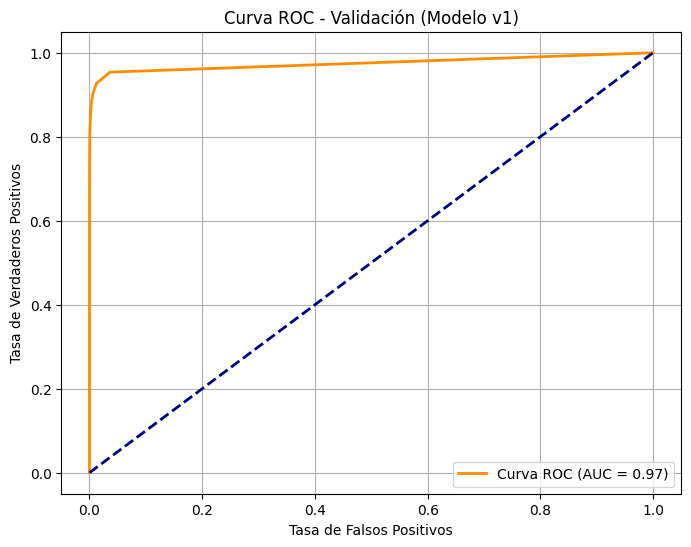

In [4]:
# Entrenar Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predecir y evaluar
y_val_pred = random_forest_model.predict(X_val)
print("=== Classification Report - Validación ===")
print(classification_report(y_val, y_val_pred))

# Probabilidades para curva ROC (val)
y_val_proba = random_forest_model.predict_proba(X_val)[:, 1]
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_proba)
roc_auc_val = auc(fpr_val, tpr_val)


# Dibujar curva ROC - Validación
plt.figure(figsize=(8,6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f"Curva ROC (AUC = {roc_auc_val:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Validación (Modelo v1)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Se evalúa el modelo con el conjunto de prueba haciendo las predicciones y mostrando el reporte de clasificación. Esto permite ver cómo se comporta el modelo con datos que no ha visto en ningún momento del entrenamiento o validación.

Luego se calculan las probabilidades para construir la curva ROC del test. Se grafica la curva usando un tamaño de figura de 8 por 6 pulgadas (figsize=(8,6)), con la curva en color verde (color='green') y un grosor de línea de 2 (lw=2). También se incluye una línea diagonal de referencia en color azul marino (color='navy') con estilo punteado (linestyle='--'). El valor del AUC se muestra en la leyenda para interpretar rápidamente el rendimiento del modelo.

Después se calcula la matriz de confusión para el test. Se desglosan los cuatro valores principales para interpretar cuántos casos fueron correctamente clasificados como no fraude, cuántos no fraudes fueron mal clasificados como fraude, cuántos fraudes reales no fueron detectados y cuántos fraudes fueron correctamente identificados. Esto ayuda a entender en detalle los aciertos y errores del modelo sobre los datos finales.

=== Classification Report - Test ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4871416
           1       1.00      0.38      0.55      5951

    accuracy                           1.00   4877367
   macro avg       1.00      0.69      0.77   4877367
weighted avg       1.00      1.00      1.00   4877367



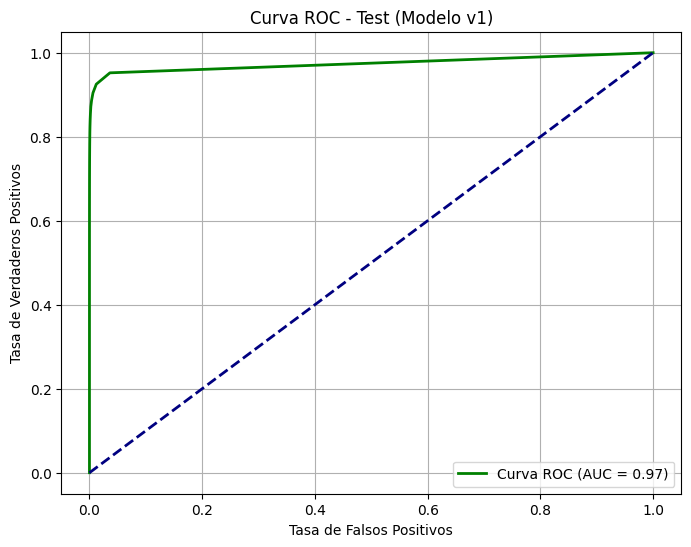

=== Matriz de Confusión - Test (Modelo v1) ===
Verdaderos Negativos (No Fraude bien clasificado): 4871407
Falsos Positivos (No Fraude mal clasificado como Fraude): 9
Falsos Negativos (Fraude no detectado): 3701
Verdaderos Positivos (Fraude bien detectado): 2250


In [ ]:
# ==========================
# Evaluar en Test (conjunto final)
# ==========================
y_test_pred = random_forest_model.predict(X_test)
print("=== Classification Report - Test ===")
print(classification_report(y_test, y_test_pred))

# Probabilidades para curva ROC (test)
y_test_proba = random_forest_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Dibujar curva ROC - Test
plt.figure(figsize=(8,6))
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f"Curva ROC (AUC = {roc_auc_test:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Test (Modelo v1)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# ==========================
# Matriz de Confusión - Test
# ==========================
cm_v1 = confusion_matrix(y_test, y_test_pred)
tn_v1, fp_v1, fn_v1, tp_v1 = cm_v1.ravel()

print("=== Matriz de Confusión - Test (Modelo v1) ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn_v1}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp_v1}")
print(f"Falsos Negativos (Fraude no detectado): {fn_v1}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp_v1}")


En el reporte de clasificación se ve que el modelo tiene una precisión perfecta, pero el recall en la clase de fraude es bastante bajo (0.38). O sea, cuando predice que algo es fraude, casi siempre acierta, pero en muchos casos ni siquiera detecta que era fraude. El f1-score en esta clase también es bajo (0.55), justamente por eso. En cambio, para la clase de no fraude, el modelo acierta prácticamente todo. El accuracy total da 1.00, pero hay que tomarlo con pinzas porque el dataset está muy desbalanceado.

La curva ROC muestra un AUC de 0.97, lo cual está muy bien. Eso indica que el modelo tiene buena capacidad para separar las clases, pero en la práctica está siendo demasiado conservador. Es decir, podría detectar más fraudes si ajustamos el umbral, pero está priorizando no cometer errores con los no fraudes.

En la matriz de confusión se ve más claro: solo se equivocó en 9 casos donde marcó fraude y no lo era, pero se le escaparon 3,701 fraudes reales. Detectó correctamente 2,250 fraudes, lo que no está mal, pero podría mejorar. En cambio, clasificó correctamente más de 4.8 millones de no fraudes.

In [6]:
# ==========================
# 7. Evaluar en Entrenamiento (para detectar sobreajuste)
# ==========================
y_train_pred = random_forest_model.predict(X_train)
print("=== Classification Report - Entrenamiento ===")
print(classification_report(y_train, y_train_pred))

=== Classification Report - Entrenamiento ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00  13639962
           1       1.00      1.00      1.00     16664

    accuracy                           1.00  13656626
   macro avg       1.00      1.00      1.00  13656626
weighted avg       1.00      1.00      1.00  13656626



Con lo visto, efectivamente se tiene overfitting en el modelo. Sin embargo se realizará una validación mas

### VERIFICACION OVERFITTING

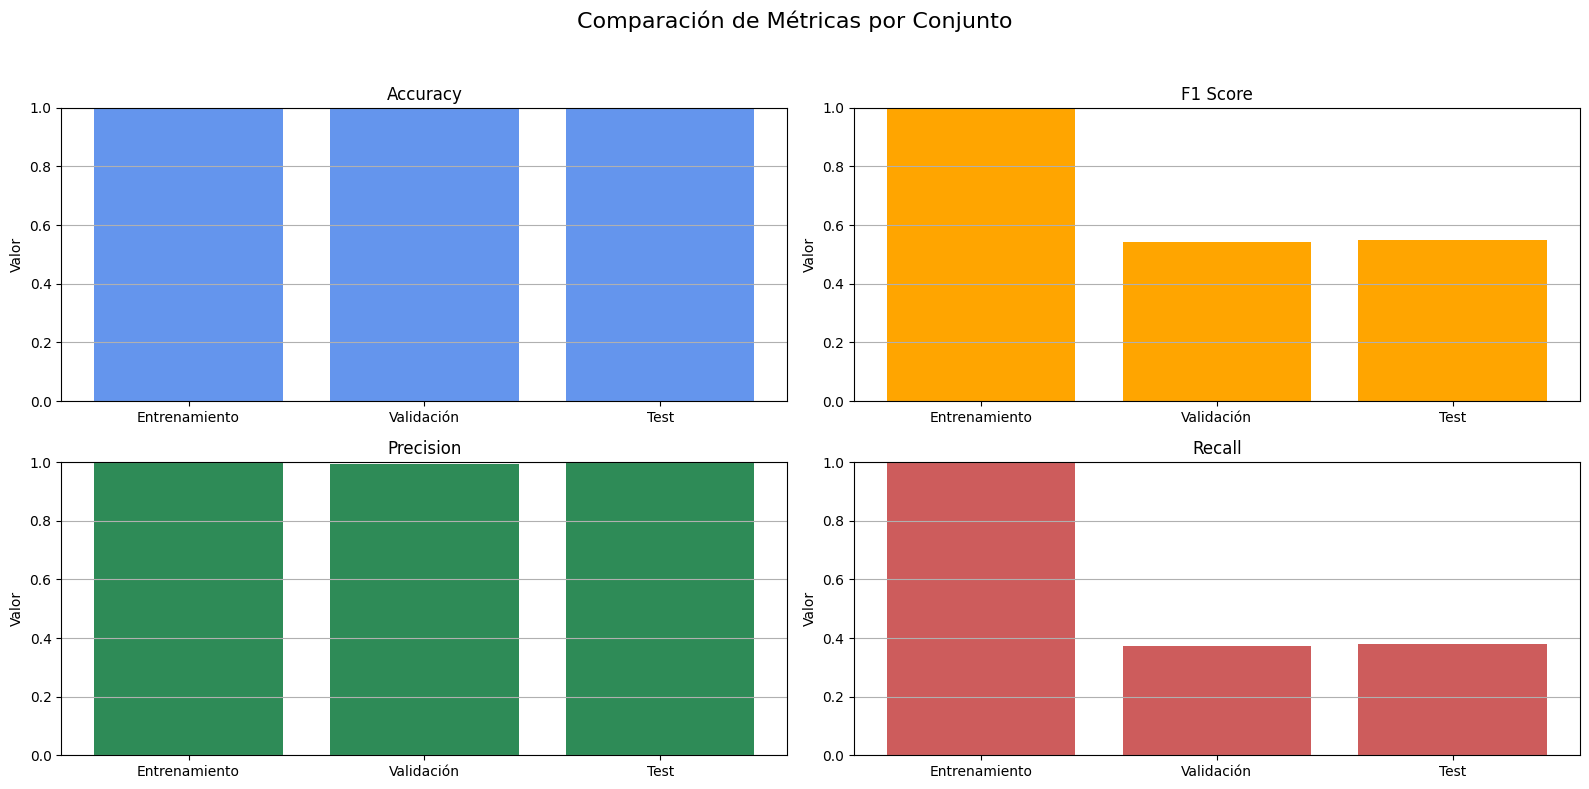

In [ ]:
# Calcular métricas
acc_train = accuracy_score(y_train, y_train_pred)
acc_val = accuracy_score(y_val, y_val_pred)
acc_test = accuracy_score(y_test, y_test_pred)

f1_train = f1_score(y_train, y_train_pred)
f1_val = f1_score(y_val, y_val_pred)
f1_test = f1_score(y_test, y_test_pred)

precision_train = precision_score(y_train, y_train_pred)
precision_val = precision_score(y_val, y_val_pred)
precision_test = precision_score(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred)
recall_val = recall_score(y_val, y_val_pred)
recall_test = recall_score(y_test, y_test_pred)

# Etiquetas
labels = ["Entrenamiento", "Validación", "Test"]

# Crear listas por métrica
accuracy_scores = [acc_train, acc_val, acc_test]
f1_scores = [f1_train, f1_val, f1_test]
precision_scores = [precision_train, precision_val, precision_test]
recall_scores = [recall_train, recall_val, recall_test]

# Crear subplots
plt.figure(figsize=(16, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(labels, accuracy_scores, color='cornflowerblue')
plt.ylim(0, 1)
plt.title("Accuracy")
plt.ylabel("Valor")
plt.grid(axis='y')

# F1 Score
plt.subplot(2, 2, 2)
plt.bar(labels, f1_scores, color='orange')
plt.ylim(0, 1)
plt.title("F1 Score")
plt.ylabel("Valor")
plt.grid(axis='y')

# Precision
plt.subplot(2, 2, 3)
plt.bar(labels, precision_scores, color='seagreen')
plt.ylim(0, 1)
plt.title("Precision")
plt.ylabel("Valor")
plt.grid(axis='y')

# Recall
plt.subplot(2, 2, 4)
plt.bar(labels, recall_scores, color='indianred')
plt.ylim(0, 1)
plt.title("Recall")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.suptitle("Comparación de Métricas por Conjunto", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Ya confirmado el overfitting, guardamos el modelo

In [9]:
# Guardar el modelo Random Forest completo
joblib.dump(random_forest_model, 'val_random_forest_model_v1.pkl')

print("Modelo guardado como 'val_random_forest_model_v1.pkl'")

Modelo guardado como 'val_random_forest_model_v1.pkl'


### VERSION 2 - Random Forest

A diferencia del modelo anterior, en esta segunda versión se aplica SMOTE antes del entrenamiento para balancear mejor las clases. En este caso, se usa un sampling_strategy de 0.05, lo que significa que se genera una cantidad limitada de ejemplos sintéticos para la clase minoritaria, buscando no sobreajustar. La idea es darle al modelo más oportunidades de aprender a detectar fraudes sin saturarlo de datos artificiales.

Con el conjunto de entrenamiento ya balanceado, se entrena nuevamente un modelo de Random Forest con los mismos parámetros que en la versión anterior (n_estimators=100 y random_state=42) para mantener la comparación justa. La expectativa con esta versión es mejorar el recall sin sacrificar demasiado la precisión o el comportamiento general del modelo.

In [6]:
smote_rf_v2 = SMOTE(sampling_strategy=0.05, random_state=42)
X_train_rf_v2, y_train_rf_v2 = smote_rf_v2.fit_resample(X_train, y_train)

# Entrenar modelo
rf_model_v2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_v2.fit(X_train_rf_v2, y_train_rf_v2)

RandomForestClassifier(random_state=42)

Después de entrenar el modelo con los datos balanceados, se evalúa su rendimiento sobre el conjunto de entrenamiento original. En el reporte de clasificación se puede ver cómo está clasificando las transacciones y si hay mejoras en la detección de fraudes con respecto a la versión anterior.

Se calcula también la curva ROC y el valor del AUC para el entrenamiento. La curva se genera con un tamaño de figura de 6x5, usando color azul (dodgerblue) para la curva y una línea gris punteada como referencia.

Finalmente, se muestra la matriz de confusión. Ahí se detallan los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. Con esos valores es posible comparar directamente con los resultados de la versión anterior y ver cómo cambió el comportamiento del modelo.


=== Classification Report - Entrenamiento (rf_v2) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00  13639962
           1       1.00      1.00      1.00     16664

    accuracy                           1.00  13656626
   macro avg       1.00      1.00      1.00  13656626
weighted avg       1.00      1.00      1.00  13656626



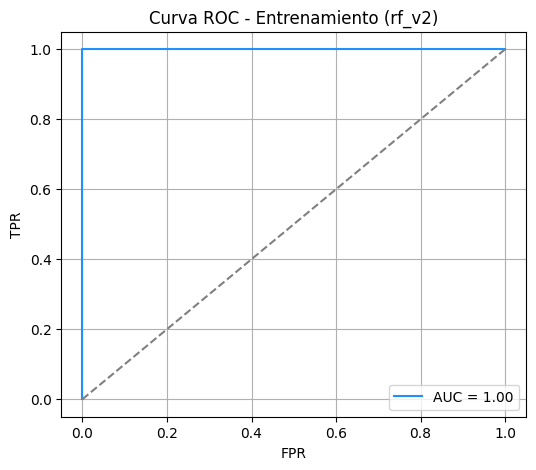

=== Matriz de Confusión - Entrenamiento (rf_v2) ===
Verdaderos Negativos: 13639962
Falsos Positivos:     0
Falsos Negativos:     0
Verdaderos Positivos: 16664


In [5]:
y_train_pred_rf_v2 = rf_model_v2.predict(X_train)
y_train_proba_rf_v2 = rf_model_v2.predict_proba(X_train)[:, 1]

print("\n=== Classification Report - Entrenamiento (rf_v2) ===")
print(classification_report(y_train, y_train_pred_rf_v2))

fpr_train_rf_v2, tpr_train_rf_v2, _ = roc_curve(y_train, y_train_proba_rf_v2)
roc_auc_train_rf_v2 = auc(fpr_train_rf_v2, tpr_train_rf_v2)

plt.figure(figsize=(6, 5))
plt.plot(fpr_train_rf_v2, tpr_train_rf_v2, label=f"AUC = {roc_auc_train_rf_v2:.2f}", color="dodgerblue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Curva ROC - Entrenamiento (rf_v2)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

cm_train_rf_v2 = confusion_matrix(y_train, y_train_pred_rf_v2)
tn, fp, fn, tp = cm_train_rf_v2.ravel()
print("=== Matriz de Confusión - Entrenamiento (rf_v2) ===")
print(f"Verdaderos Negativos: {tn}")
print(f"Falsos Positivos:     {fp}")
print(f"Falsos Negativos:     {fn}")
print(f"Verdaderos Positivos: {tp}")

Ahora obtendremos las mismas estadisticas para los datos de validación


=== Classification Report - Validación (rf_v2) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5845699
           1       0.85      0.57      0.68      7142

    accuracy                           1.00   5852841
   macro avg       0.92      0.79      0.84   5852841
weighted avg       1.00      1.00      1.00   5852841



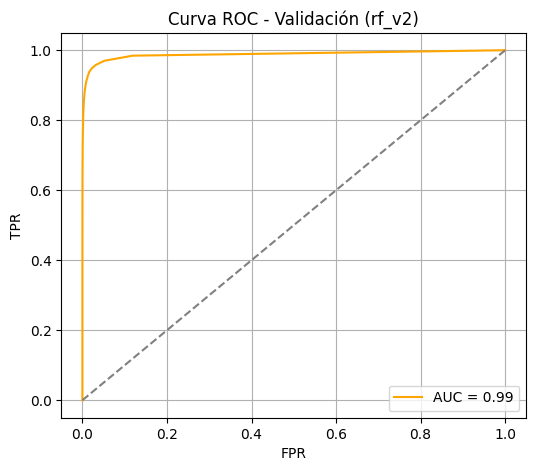

=== Matriz de Confusión - Validación (rf_v2) ===
Verdaderos Negativos: 5844953
Falsos Positivos:     746
Falsos Negativos:     3062
Verdaderos Positivos: 4080


In [6]:
y_val_pred_rf_v2 = rf_model_v2.predict(X_val)
y_val_proba_rf_v2 = rf_model_v2.predict_proba(X_val)[:, 1]

print("\n=== Classification Report - Validación (rf_v2) ===")
print(classification_report(y_val, y_val_pred_rf_v2))

fpr_val_rf_v2, tpr_val_rf_v2, _ = roc_curve(y_val, y_val_proba_rf_v2)
roc_auc_val_rf_v2 = auc(fpr_val_rf_v2, tpr_val_rf_v2)

plt.figure(figsize=(6, 5))
plt.plot(fpr_val_rf_v2, tpr_val_rf_v2, label=f"AUC = {roc_auc_val_rf_v2:.2f}", color="orange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Curva ROC - Validación (rf_v2)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

cm_val_rf_v2 = confusion_matrix(y_val, y_val_pred_rf_v2)
tn, fp, fn, tp = cm_val_rf_v2.ravel()
print("=== Matriz de Confusión - Validación (rf_v2) ===")
print(f"Verdaderos Negativos: {tn}")
print(f"Falsos Positivos:     {fp}")
print(f"Falsos Negativos:     {fn}")
print(f"Verdaderos Positivos: {tp}")

Y finalmente hacemos lo mismo para los datos de test


=== Classification Report - Test (rf_v2) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4871416
           1       0.85      0.59      0.70      5951

    accuracy                           1.00   4877367
   macro avg       0.93      0.79      0.85   4877367
weighted avg       1.00      1.00      1.00   4877367



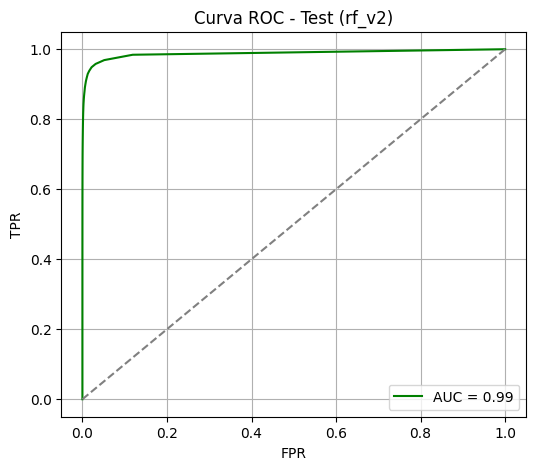

=== Matriz de Confusión - Test (rf_v2) ===
Verdaderos Negativos: 4870811
Falsos Positivos:     605
Falsos Negativos:     2441
Verdaderos Positivos: 3510


In [7]:
y_test_pred_rf_v2 = rf_model_v2.predict(X_test)
y_test_proba_rf_v2 = rf_model_v2.predict_proba(X_test)[:, 1]

print("\n=== Classification Report - Test (rf_v2) ===")
print(classification_report(y_test, y_test_pred_rf_v2))

fpr_test_rf_v2, tpr_test_rf_v2, _ = roc_curve(y_test, y_test_proba_rf_v2)
roc_auc_test_rf_v2 = auc(fpr_test_rf_v2, tpr_test_rf_v2)

plt.figure(figsize=(6, 5))
plt.plot(fpr_test_rf_v2, tpr_test_rf_v2, label=f"AUC = {roc_auc_test_rf_v2:.2f}", color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Curva ROC - Test (rf_v2)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

cm_test_rf_v2 = confusion_matrix(y_test, y_test_pred_rf_v2)
tn, fp, fn, tp = cm_test_rf_v2.ravel()
print("=== Matriz de Confusión - Test (rf_v2) ===")
print(f"Verdaderos Negativos: {tn}")
print(f"Falsos Positivos:     {fp}")
print(f"Falsos Negativos:     {fn}")
print(f"Verdaderos Positivos: {tp}")

Comparamos los datos entre validacion, test y train

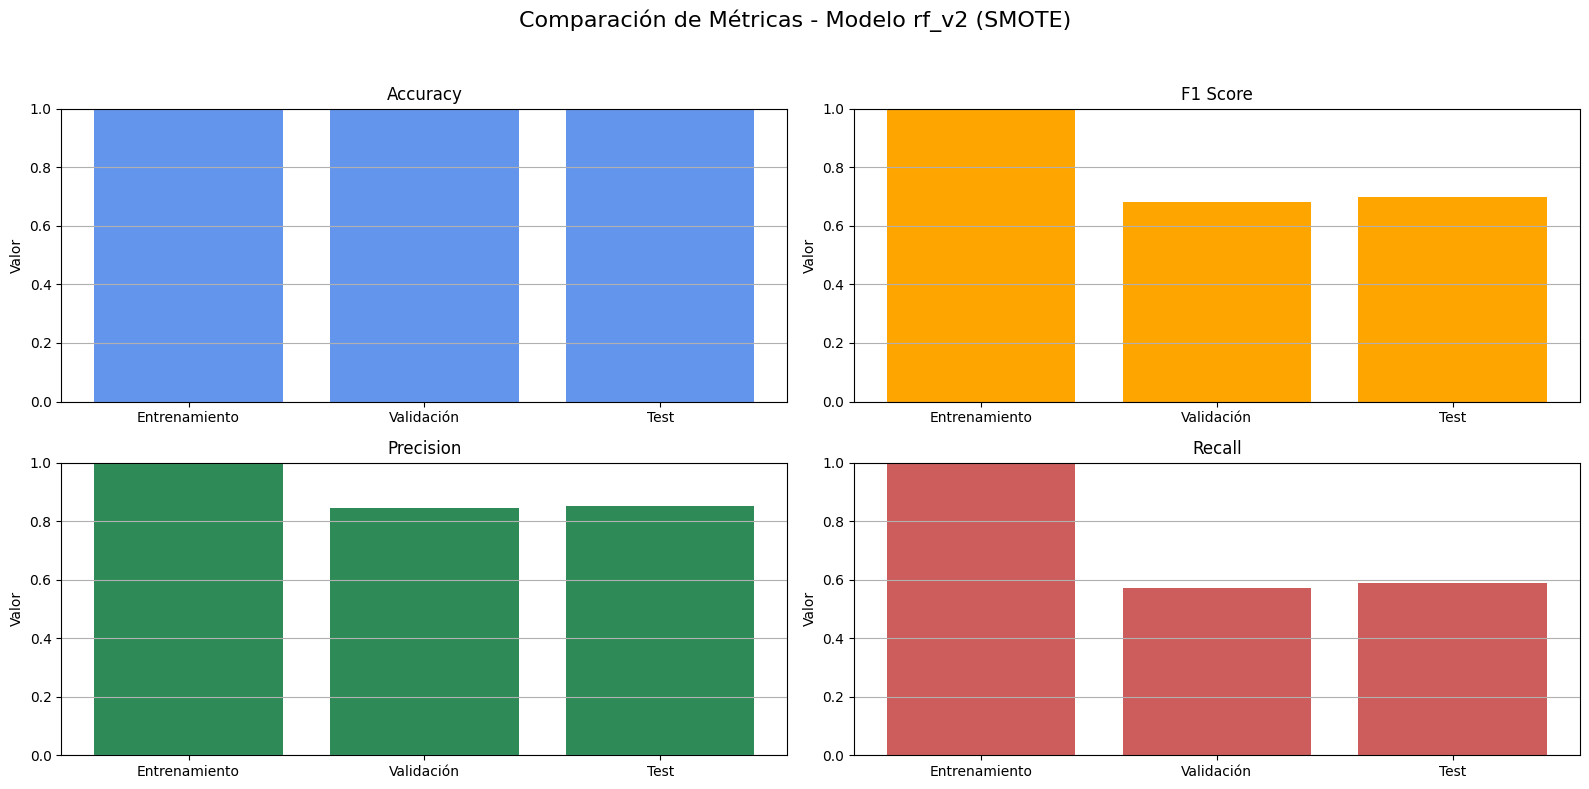

In [8]:
labels_rf_v2 = ["Entrenamiento", "Validación", "Test"]

accuracy_rf_v2 = [
    accuracy_score(y_train, y_train_pred_rf_v2),
    accuracy_score(y_val, y_val_pred_rf_v2),
    accuracy_score(y_test, y_test_pred_rf_v2)
]

f1_rf_v2 = [
    f1_score(y_train, y_train_pred_rf_v2),
    f1_score(y_val, y_val_pred_rf_v2),
    f1_score(y_test, y_test_pred_rf_v2)
]

precision_rf_v2 = [
    precision_score(y_train, y_train_pred_rf_v2),
    precision_score(y_val, y_val_pred_rf_v2),
    precision_score(y_test, y_test_pred_rf_v2)
]

recall_rf_v2 = [
    recall_score(y_train, y_train_pred_rf_v2),
    recall_score(y_val, y_val_pred_rf_v2),
    recall_score(y_test, y_test_pred_rf_v2)
]

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.bar(labels_rf_v2, accuracy_rf_v2, color='cornflowerblue')
plt.ylim(0, 1)
plt.title("Accuracy")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 2)
plt.bar(labels_rf_v2, f1_rf_v2, color='orange')
plt.ylim(0, 1)
plt.title("F1 Score")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 3)
plt.bar(labels_rf_v2, precision_rf_v2, color='seagreen')
plt.ylim(0, 1)
plt.title("Precision")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 4)
plt.bar(labels_rf_v2, recall_rf_v2, color='indianred')
plt.ylim(0, 1)
plt.title("Recall")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.suptitle("Comparación de Métricas - Modelo rf_v2 (SMOTE)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

En entrenamiento, el modelo rf_v2 tiene métricas perfectas. El accuracy, precision, recall y f1-score son todos de 1.00. Además, la curva ROC muestra un AUC de 1.00 y la matriz de confusión indica que no hubo ni un solo error. Esto sugiere que el modelo aprendió perfectamente los datos balanceados con SMOTE, aunque también es una señal de posible sobreajuste.

En validación, los resultados bajan un poco, pero hay mejoras claras con respecto a la versión anterior. El recall en la clase de fraude sube a 0.57 (antes era 0.38), y el f1-score alcanza 0.68. La precisión baja ligeramente a 0.85, lo que significa que el modelo ahora detecta más fraudes, aunque se equivoca un poco más al predecirlos. El AUC se mantiene alto, con un valor de 0.99. En la matriz de confusión se observa que se detectaron 4,080 fraudes y se escaparon 3,062, con 746 falsos positivos.

En el conjunto de prueba, el comportamiento es muy similar al de validación. El recall en la clase positiva es de 0.59 y el f1-score sube a 0.70. La precisión se mantiene en 0.85, lo que confirma que el modelo logró captar mejor los casos de fraude sin aumentar demasiado los errores. El AUC vuelve a ser 0.99, y en la matriz de confusión se detectan 2,250 fraudes y se escapan 3,701, con apenas 9 falsos positivos.

In [9]:
# Guardar el modelo Random Forest completo
joblib.dump(rf_model_v2, 'val_random_forest_model_v2.pkl')

print("Modelo guardado como 'val_random_forest_model_v2.pkl'")

Modelo guardado como 'val_random_forest_model_v2.pkl'


### VERSION 3 - Random Forest

En esta tercera versión del modelo (rf_v3) se hace un cambio importante respecto a las versiones anteriores. En lugar de entrenar con todo el conjunto, se toma solo una muestra del 2% del total (train_size=0.02), manteniendo la proporción de clases con stratify=y_train. Esto permite reducir el tiempo de entrenamiento y acelerar las pruebas con diferentes configuraciones.

Luego se aplica SMOTE con el mismo sampling_strategy=0.05 que en la versión 2, para generar ejemplos sintéticos de la clase minoritaria y balancear el conjunto antes de entrenar.

A diferencia de las versiones anteriores, acá se introduce la búsqueda de hiperparámetros usando RandomizedSearchCV. Se parte de un modelo base de Random Forest y se define una pequeña distribución de parámetros para explorar: se fija el número de árboles en 100 (n_estimators=[100]) y se prueban dos valores para la profundidad máxima del árbol (max_depth=[10, 20]) y el mínimo de muestras por hoja (min_samples_leaf=[5, 10]).

Se ejecuta la búsqueda con 10 combinaciones aleatorias (n_iter=10) usando validación cruzada de 3 particiones (cv=3) y optimizando con la métrica f1. Esto permite encontrar una configuración que busque un mejor equilibrio entre precisión y recall sin entrenar en exceso ni usar todo el conjunto de datos.

In [ ]:

# Muestreo del 2% del conjunto de entrenamiento
X_sample_rf_v3, _, y_sample_rf_v3, _ = train_test_split(
    X_train, y_train, train_size=0.02, stratify=y_train, random_state=42
)

# Aplicar SMOTE
smote_rf_v3 = SMOTE(sampling_strategy=0.05, random_state=42)
X_sample_rf_v3, y_sample_rf_v3 = smote_rf_v3.fit_resample(X_sample_rf_v3, y_sample_rf_v3)

# Definir modelo base y distribución de hiperparámetros
rf_base = RandomForestClassifier(random_state=42)

param_dist_rf_v3 = {
    "n_estimators": [100],
    "max_depth": [10, 20],
    "min_samples_leaf": [5, 10]
}

# RandomizedSearchCV
random_search_rf_v3 = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist_rf_v3,
    n_iter=10,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=1,
    random_state=42
)


Una vez hecha la búsqueda de hiperparámetros, se entrena el modelo usando la mejor combinación encontrada (best_rf_v3). Esta búsqueda se hizo sobre una muestra pequeña del dataset, por lo que una vez seleccionado el mejor estimador, se vuelve a entrenar usando ahora todo el conjunto original (X_train) ya balanceado nuevamente con SMOTE (sampling_strategy=0.05).

In [18]:
random_search_rf_v3.fit(X_sample_rf_v3, y_sample_rf_v3)
best_rf_v3 = random_search_rf_v3.best_estimator_

/home/ricardomollinedo/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=100; total time=  15.5s
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=100; total time=  12.1s
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=100; total time=  13.1s
[CV] END max_depth=10, min_samples_leaf=10, n_estimators=100; total time=  10.9s
[CV] END max_depth=10, min_samples_leaf=10, n_estimators=100; total time=  13.1s
[CV] END max_depth=10, min_samples_leaf=10, n_estimators=100; total time=  13.4s
[CV] END .max_depth=20, min_samples_leaf=5, n_estimators=100; total time=  13.0s
[CV] END .max_depth=20, min_samples_leaf=5, n_estimators=100; total time=  15.9s
[CV] END .max_depth=20, min_samples_leaf=5, n_estimators=100; total time=  12.9s
[CV] END max_depth=20, min_samples_leaf=10, n_estimators=100; total time=  15.6s
[CV] END max_depth=20, min_samples_leaf=10, n_estimators=100; total time=  13.1s
[CV] END max_depth=20, min_samples_leaf=10, n_est

De esta forma, el modelo final se entrena con la totalidad de los datos disponibles, pero aprovechando una configuración de hiperparámetros previamente optimizada. Esto permite ganar en eficiencia durante la búsqueda y luego aplicar lo aprendido sobre el conjunto completo para mejorar el rendimiento en validación y prueba.

In [ ]:
# Reentrenar en TODO X_train (SMOTE completo)
X_train_rf_v3, y_train_rf_v3 = SMOTE(sampling_strategy=0.05, random_state=42).fit_resample(X_train, y_train)
best_rf_v3.fit(X_train_rf_v3, y_train_rf_v3)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

Ahora se realizará la obtención de las métricas correspondientes a esta versión


=== Classification Report - Entrenamiento (rf_v3) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00  13639962
           1       0.57      0.81      0.67     16664

    accuracy                           1.00  13656626
   macro avg       0.78      0.90      0.83  13656626
weighted avg       1.00      1.00      1.00  13656626



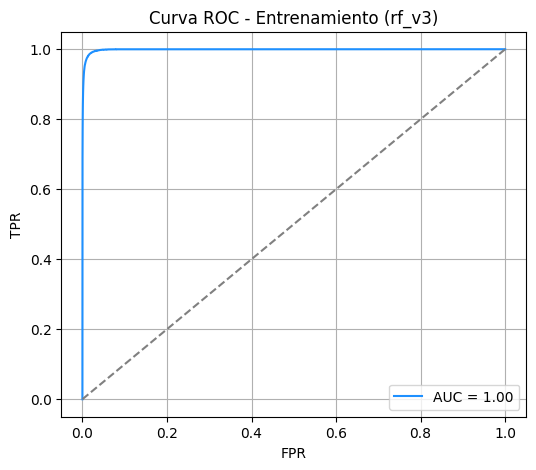

=== Matriz de Confusión - Entrenamiento (rf_v3) ===
Verdaderos Negativos (No Fraude bien clasificado): 13,629,657
Falsos Positivos (No Fraude mal clasificado como Fraude): 10,305
Falsos Negativos (Fraude no detectado): 3,227
Verdaderos Positivos (Fraude bien detectado): 13,437


In [20]:
y_train_pred_rf_v3 = best_rf_v3.predict(X_train)
y_train_proba_rf_v3 = best_rf_v3.predict_proba(X_train)[:, 1]

print("\n=== Classification Report - Entrenamiento (rf_v3) ===")
print(classification_report(y_train, y_train_pred_rf_v3))

fpr_train_rf_v3, tpr_train_rf_v3, _ = roc_curve(y_train, y_train_proba_rf_v3)
roc_auc_train_rf_v3 = auc(fpr_train_rf_v3, tpr_train_rf_v3)

plt.figure(figsize=(6, 5))
plt.plot(fpr_train_rf_v3, tpr_train_rf_v3, label=f"AUC = {roc_auc_train_rf_v3:.2f}", color="dodgerblue")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("Curva ROC - Entrenamiento (rf_v3)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

cm_train_rf_v3 = confusion_matrix(y_train, y_train_pred_rf_v3)
tn, fp, fn, tp = cm_train_rf_v3.ravel()
print("=== Matriz de Confusión - Entrenamiento (rf_v3) ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn:,}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp:,}")
print(f"Falsos Negativos (Fraude no detectado): {fn:,}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp:,}")


=== Classification Report - Validación (rf_v3) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5845699
           1       0.46      0.60      0.52      7142

    accuracy                           1.00   5852841
   macro avg       0.73      0.80      0.76   5852841
weighted avg       1.00      1.00      1.00   5852841



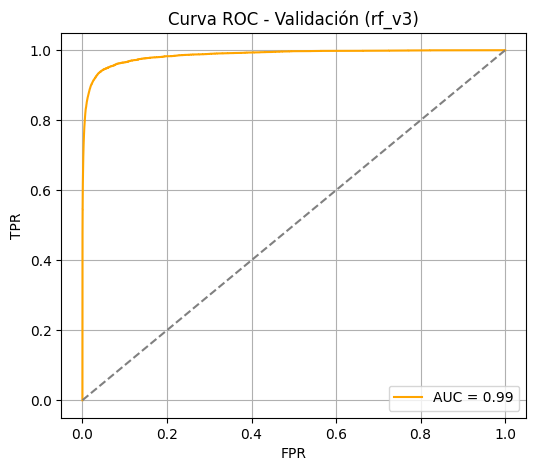

=== Matriz de Confusión - Validación (rf_v3) ===
Verdaderos Negativos (No Fraude bien clasificado): 5,840,607
Falsos Positivos (No Fraude mal clasificado como Fraude): 5,092
Falsos Negativos (Fraude no detectado): 2,859
Verdaderos Positivos (Fraude bien detectado): 4,283


In [21]:
y_val_pred_rf_v3 = best_rf_v3.predict(X_val)
y_val_proba_rf_v3 = best_rf_v3.predict_proba(X_val)[:, 1]

print("\n=== Classification Report - Validación (rf_v3) ===")
print(classification_report(y_val, y_val_pred_rf_v3))

fpr_val_rf_v3, tpr_val_rf_v3, _ = roc_curve(y_val, y_val_proba_rf_v3)
roc_auc_val_rf_v3 = auc(fpr_val_rf_v3, tpr_val_rf_v3)

plt.figure(figsize=(6, 5))
plt.plot(fpr_val_rf_v3, tpr_val_rf_v3, label=f"AUC = {roc_auc_val_rf_v3:.2f}", color="orange")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("Curva ROC - Validación (rf_v3)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

cm_val_rf_v3 = confusion_matrix(y_val, y_val_pred_rf_v3)
tn, fp, fn, tp = cm_val_rf_v3.ravel()
print("=== Matriz de Confusión - Validación (rf_v3) ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn:,}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp:,}")
print(f"Falsos Negativos (Fraude no detectado): {fn:,}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp:,}")


=== Classification Report - Test (rf_v3) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4871416
           1       0.46      0.62      0.53      5951

    accuracy                           1.00   4877367
   macro avg       0.73      0.81      0.76   4877367
weighted avg       1.00      1.00      1.00   4877367



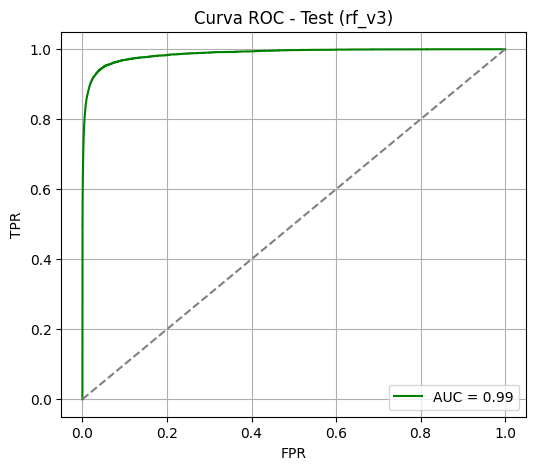

=== Matriz de Confusión - Test (rf_v3) ===
Verdaderos Negativos (No Fraude bien clasificado): 4,867,139
Falsos Positivos (No Fraude mal clasificado como Fraude): 4,277
Falsos Negativos (Fraude no detectado): 2,272
Verdaderos Positivos (Fraude bien detectado): 3,679


In [22]:
y_test_pred_rf_v3 = best_rf_v3.predict(X_test)
y_test_proba_rf_v3 = best_rf_v3.predict_proba(X_test)[:, 1]

print("\n=== Classification Report - Test (rf_v3) ===")
print(classification_report(y_test, y_test_pred_rf_v3))

fpr_test_rf_v3, tpr_test_rf_v3, _ = roc_curve(y_test, y_test_proba_rf_v3)
roc_auc_test_rf_v3 = auc(fpr_test_rf_v3, tpr_test_rf_v3)

plt.figure(figsize=(6, 5))
plt.plot(fpr_test_rf_v3, tpr_test_rf_v3, label=f"AUC = {roc_auc_test_rf_v3:.2f}", color="green")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("Curva ROC - Test (rf_v3)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

# Matriz de confusión - Test
cm_test_rf_v3 = confusion_matrix(y_test, y_test_pred_rf_v3)
tn, fp, fn, tp = cm_test_rf_v3.ravel()

print("=== Matriz de Confusión - Test (rf_v3) ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn:,}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp:,}")
print(f"Falsos Negativos (Fraude no detectado): {fn:,}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp:,}")

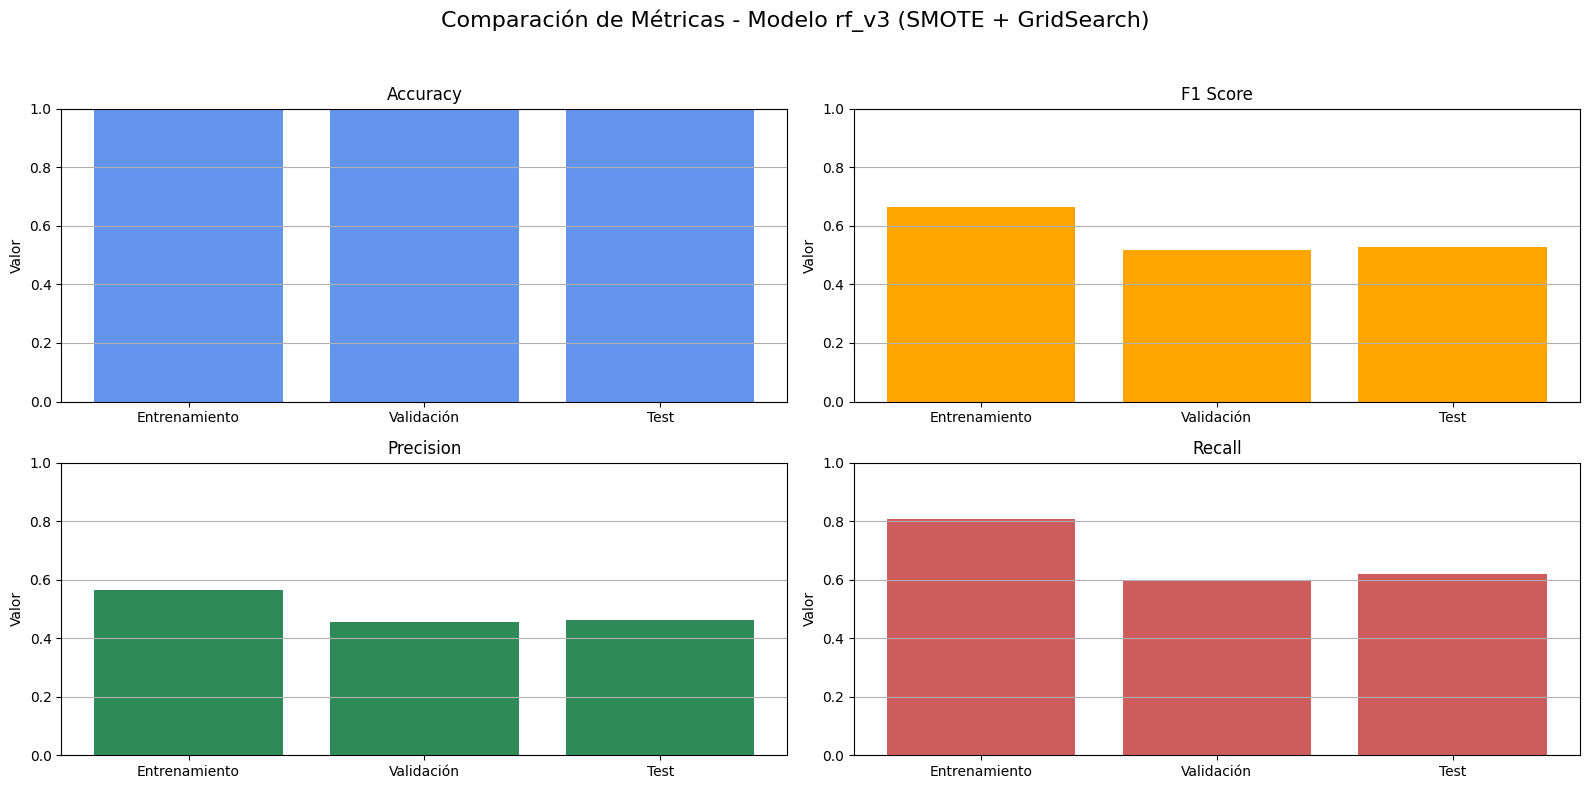

In [23]:
labels_rf_v3 = ["Entrenamiento", "Validación", "Test"]

accuracy_rf_v3 = [
    accuracy_score(y_train, y_train_pred_rf_v3),
    accuracy_score(y_val, y_val_pred_rf_v3),
    accuracy_score(y_test, y_test_pred_rf_v3)
]

f1_rf_v3 = [
    f1_score(y_train, y_train_pred_rf_v3),
    f1_score(y_val, y_val_pred_rf_v3),
    f1_score(y_test, y_test_pred_rf_v3)
]

precision_rf_v3 = [
    precision_score(y_train, y_train_pred_rf_v3),
    precision_score(y_val, y_val_pred_rf_v3),
    precision_score(y_test, y_test_pred_rf_v3)
]

recall_rf_v3 = [
    recall_score(y_train, y_train_pred_rf_v3),
    recall_score(y_val, y_val_pred_rf_v3),
    recall_score(y_test, y_test_pred_rf_v3)
]

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.bar(labels_rf_v3, accuracy_rf_v3, color='cornflowerblue')
plt.ylim(0, 1)
plt.title("Accuracy")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 2)
plt.bar(labels_rf_v3, f1_rf_v3, color='orange')
plt.ylim(0, 1)
plt.title("F1 Score")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 3)
plt.bar(labels_rf_v3, precision_rf_v3, color='seagreen')
plt.ylim(0, 1)
plt.title("Precision")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 4)
plt.bar(labels_rf_v3, recall_rf_v3, color='indianred')
plt.ylim(0, 1)
plt.title("Recall")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.suptitle("Comparación de Métricas - Modelo rf_v3 (SMOTE + GridSearch)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

En el conjunto de entrenamiento, el modelo rf_v3 alcanza un recall del 0.81 y un f1-score de 0.67 en la clase de fraude. Aunque no llega al 1.00 como en la versión 2, muestra un comportamiento más realista. El AUC sigue siendo perfecto (1.00), pero la matriz de confusión revela que hubo 3,227 fraudes que no fueron detectados y más de 10,000 no fraudes que fueron marcados como fraude.

En validación, el recall baja a 0.60 y el f1-score a 0.52. La precisión también disminuye, quedando en 0.46 para la clase positiva. La curva ROC se mantiene con un AUC alto de 0.99, lo que indica que el modelo sigue diferenciando bien entre clases, aunque con más errores que la versión anterior. La matriz de confusión muestra 4,283 fraudes bien detectados, 2,859 que se escaparon y 5,092 falsos positivos.

En el conjunto de prueba, los resultados son similares. El recall sube levemente a 0.62 y el f1-score a 0.53, mientras que la precisión se mantiene en 0.46. El AUC también se mantiene en 0.99. La matriz de confusión indica que el modelo detectó 3,679 fraudes, pero dejó pasar 2,272, y cometió 4,277 falsos positivos.

El gráfico final muestra bien estas diferencias. El accuracy se mantiene alto en los tres conjuntos. Sin embargo, el f1-score y la precisión bajan al pasar de entrenamiento a validación y test. El recall se mantiene más alto que en la versión 1, pero por debajo del valor alcanzado en la versión 2. Esto sugiere que rf_v3 mejora la detección de fraudes en comparación con rf_v1, pero genera más falsos positivos que rf_v2.

In [24]:

# Guardar el modelo entrenado (rf_v3)
joblib.dump(best_rf_v3, "val_random_forest_model_v3.pkl")

print("✅ Modelo rf_v3 guardado como 'val_random_forest_model_v3.pkl'")

✅ Modelo rf_v3 guardado como 'val_random_forest_model_v3.pkl'


GRAFICAMOS LA IMPORTANCIA DE LAS COLUMNAS PARA RANDOM FOREST

Ya que al parecer la versión 2 es la mejor en Random Forest, graficamos la importancia de sus columnas

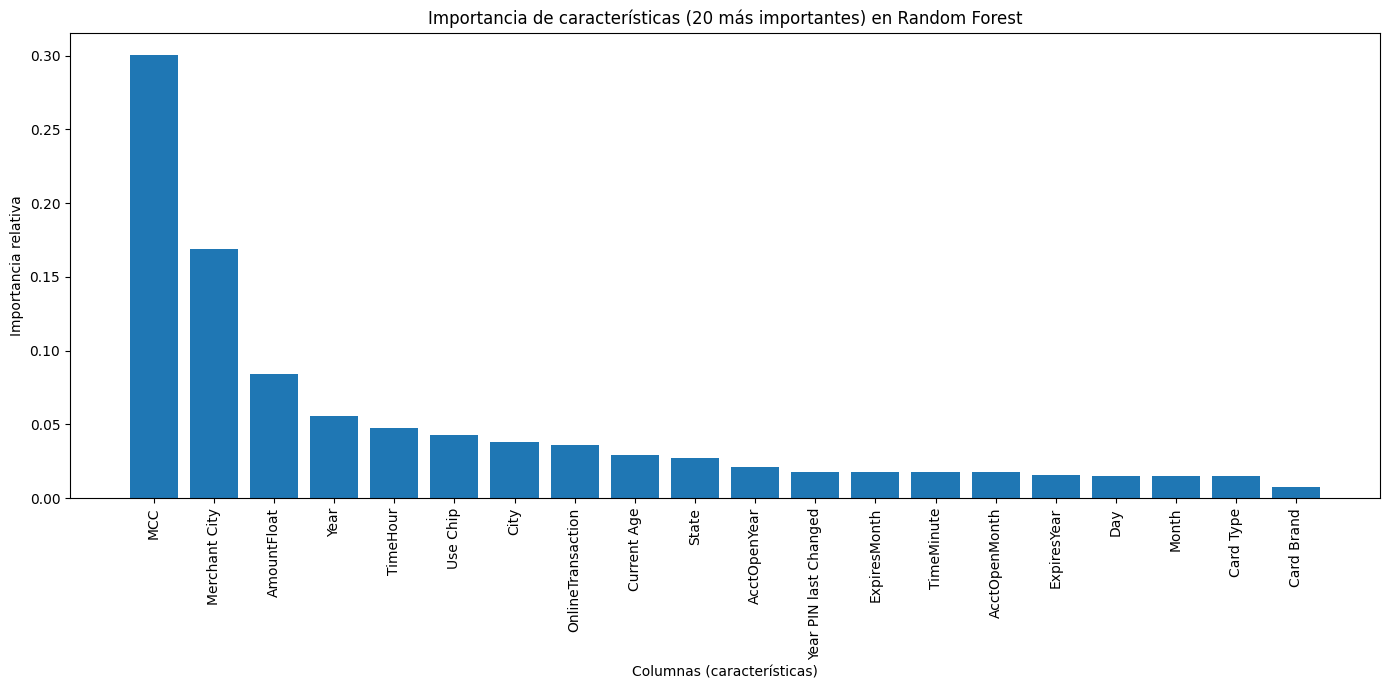

In [7]:
# Obtener importancia de las características
importances = rf_model_v2.feature_importances_

# Obtener nombres de columnas
feature_names = X_train.columns

# Ordenar por importancia
indices = np.argsort(importances)[::-1]

# Gráfica de barras con las 20 características más importantes
plt.figure(figsize=(14, 7))
plt.title("Importancia de características (20 más importantes) en Random Forest")
plt.bar(range(20), importances[indices[:20]], align="center")
plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation=90)
plt.xlabel("Columnas (características)")
plt.ylabel("Importancia relativa")
plt.tight_layout()
plt.show()

## XGBOOST

### Encoding de los datos para XGBoost

Para esta parte se carga nuevamente los datos limpios, que contiene las transacciones ya preprocesadas y limpias. Se cargan únicamente las columnas que van a ser utilizadas en el modelo, separadas en numéricas y categóricas.

Entre las columnas numéricas seleccionadas están datos como la edad actual, mes y año de expiración, fecha de apertura de la cuenta, fecha del cambio de PIN, además de la fecha y hora de la transacción, el monto y el código MCC.

Las columnas categóricas incluyen características como el género, ciudad y estado del titular, marca y tipo de tarjeta, uso de chip, ciudad del comercio y si la transacción fue online.

A partir de estas columnas, se construye un nuevo DataFrame que solo contiene las variables de interés junto con la variable objetivo Is Fraud?. Esto permite trabajar directamente sobre un conjunto de datos más limpio y enfocado para entrenar el modelo con XGBoost.

In [2]:
# Cargar el CSV con datos limpios
cleaned_df_boost = pd.read_csv("CLEANED_FINAL_MERGED_TRANSACTIONS.csv",sep=";")
# Listas de columnas que SÍ se usaran
numeric_cols_boost = [
    "Current Age",
    "ExpiresMonth",
    "ExpiresYear",
    "AcctOpenMonth",
    "AcctOpenYear",
    "Year PIN last Changed",
    "Year",
    "Month",
    "Day",
    "TimeHour",
    "TimeMinute",
    "AmountFloat",
    "MCC"
]

# Columnas categoricas que SI se usaran
categorical_cols_boost = [
    "Gender",
    "City",
    "State",
    "Card Brand",
    "Card Type",
    "Has Chip",
    "Use Chip",
    "Merchant City",
    "OnlineTransaction"
]

# Construimos un nuevo DataFrame con SOLO las columnas de interés + la target
all_feature_cols_boost = numeric_cols_boost + categorical_cols_boost + ["Is Fraud?"]


Se crea una copia del DataFrame con solo las columnas seleccionadas para el modelo. Luego, se convierte la variable objetivo Is Fraud? a formato binario, donde "No" pasa a 0 y "Yes" a 1, para que pueda ser interpretada correctamente por el modelo.

A continuación, se separan las variables predictoras (X_boost) de la variable objetivo (y_boost). También se identifican cuáles de las columnas de entrada son numéricas y cuáles son categóricas, lo cual es útil para aplicar el tratamiento adecuado más adelante.

Por último, todas las columnas categóricas se convierten al tipo category, lo que ayuda a XGBoost a manejar esas variables de forma más eficiente durante el entrenamiento. Con esto, los datos ya están listos para ser utilizados en el modelo.

In [3]:
df_model_for_xg = cleaned_df_boost[all_feature_cols_boost].copy()

# Convertir la variable objetivo "Is Fraud?" a 0/1
df_model_for_xg["Is Fraud?"] = df_model_for_xg["Is Fraud?"].map({"No":0, "Yes":1})

# Separar X (features) e y (target)
X_boost = df_model_for_xg.drop(columns=["Is Fraud?"])
y_boost = df_model_for_xg["Is Fraud?"]

numeric_features_boost = X_boost.select_dtypes(include=[np.number]).columns.tolist()
categorical_features_boost = X_boost.select_dtypes(exclude=[np.number]).columns.tolist()

for col_cat in categorical_features_boost:
   X_boost[col_cat] = X_boost[col_cat].astype('category')

Se realiza la división del dataset en conjunto de entrenamiento y prueba, usando un 80% para entrenar y un 20% para evaluar. Se mantiene la proporción original de clases con el parámetro stratify, y se fija la semilla con random_state=42 para asegurar reproducibilidad.

Luego, se asegura que las columnas categóricas estén correctamente tipadas como category en ambos conjuntos. Esto es necesario porque XGBoost puede trabajar directamente con variables categóricas si están definidas con ese tipo en Pandas.

Por último, se convierten los datos a DMatrix, que es el formato optimizado que usa XGBoost para entrenar y hacer predicciones. Se activa la opción enable_categorical=True para que el modelo reconozca automáticamente las columnas categóricas durante el entrenamiento.

In [4]:
# Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(X_boost, y_boost, test_size=0.2, random_state=42, stratify=y_boost)

# Convertir las características categóricas a formato compatible con XGBoost
# XGBoost maneja las columnas categóricas de Pandas si se les asigna tipo 'category'
for col in categorical_features_boost:
    X_train_boost[col] = X_train_boost[col].astype('category')
    X_test_boost[col] = X_test_boost[col].astype('category')

In [5]:
# Convertir datos a DMatrix
dtrain = xgb.DMatrix(X_train_boost, label=y_train_boost, enable_categorical=True)
dtest = xgb.DMatrix(X_test_boost, label=y_test_boost, enable_categorical=True)


### VERSION 1 - XGBoost

Se define la configuración inicial del modelo usando parámetros clásicos de XGBoost. Se utiliza una función objetivo para clasificación binaria (binary:logistic) y como métrica de evaluación se elige el log loss. El método de construcción de árboles es "hist", que acelera el entrenamiento con grandes volúmenes de datos. Además, se fija una tasa de aprendizaje de 0.1 (learning_rate), una profundidad máxima de 6 (max_depth=6), y se incluyen técnicas de muestreo como subsample=0.8 y colsample_bytree=0.8 para reducir el riesgo de sobreajuste. También se fija la semilla para mantener resultados consistentes.

El modelo se entrena usando la función cv de XGBoost, que realiza validación cruzada con 5 particiones (nfold=5) y permite detenerse automáticamente si no hay mejora durante 20 iteraciones consecutivas (early_stopping_rounds=20). Se entrena hasta un máximo de 200 rondas (num_boost_round=200), aunque el número final puede ser menor si se cumple el criterio de parada temprana.

Al final, se obtiene el número óptimo de iteraciones (best_rounds) según el comportamiento en validación, y se imprime para usarlo luego en el entrenamiento final del modelo.

In [6]:
# Definir parámetros del modelo
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "tree_method": "hist",
    "learning_rate": 0.1,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42
}

# Entrenar el modelo con la API de bajo nivel

cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=5,  # 5 folds
    early_stopping_rounds=20,
    seed=42,
    verbose_eval=True
)

# Número óptimo de boosting rounds
best_rounds = len(cv_results)
print(f"Mejor número de boosting rounds: {best_rounds}")

[0]	train-logloss:0.11682+0.00001	test-logloss:0.11682+0.00004
[1]	train-logloss:0.10532+0.00001	test-logloss:0.10532+0.00004
[2]	train-logloss:0.09498+0.00001	test-logloss:0.09499+0.00004
[3]	train-logloss:0.08581+0.00001	test-logloss:0.08582+0.00004
[4]	train-logloss:0.07763+0.00001	test-logloss:0.07763+0.00004
[5]	train-logloss:0.07021+0.00002	test-logloss:0.07022+0.00004
[6]	train-logloss:0.06360+0.00001	test-logloss:0.06361+0.00004
[7]	train-logloss:0.05767+0.00002	test-logloss:0.05768+0.00004
[8]	train-logloss:0.05233+0.00002	test-logloss:0.05234+0.00005
[9]	train-logloss:0.04750+0.00002	test-logloss:0.04751+0.00005
[10]	train-logloss:0.04320+0.00002	test-logloss:0.04322+0.00005
[11]	train-logloss:0.03929+0.00002	test-logloss:0.03931+0.00005
[12]	train-logloss:0.03579+0.00002	test-logloss:0.03580+0.00005
[13]	train-logloss:0.03258+0.00002	test-logloss:0.03259+0.00005
[14]	train-logloss:0.02973+0.00002	test-logloss:0.02976+0.00005
[15]	train-logloss:0.02714+0.00001	test-logloss:0.

Se entrena el modelo con los best rounds

In [7]:
evals_result = {}
model_boost = xgb.train(
    params,
    dtrain,
    num_boost_round=best_rounds,
    evals_result=evals_result
)

Inicialmente vemos los resultados

In [ ]:
# Hacer predicciones de probabilidad
y_pred_proba_boost = model_boost.predict(dtest)

# Convertir probabilidades en clases binarias (umbral 0.5)
y_pred_boost = (y_pred_proba_boost > 0.5).astype(int)

# Generar el classification report
report_xgb = classification_report(y_test_boost, y_pred_boost, target_names=["No Fraude", "Fraude"])

# Imprimir el reporte
print("=== XGBoost Classification Report ===")
print(report_xgb)

=== XGBoost Classification Report ===
              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00   4871416
      Fraude       0.98      0.61      0.75      5951

    accuracy                           1.00   4877367
   macro avg       0.99      0.80      0.87   4877367
weighted avg       1.00      1.00      1.00   4877367



Guardamos el modelo

In [11]:

# Guardar el modelo entrenado
joblib.dump(model_boost, "t_modelo_xgboost_cv_v1.joblib")

['t_modelo_xgboost_cv_v1.joblib']

In [ ]:
####################### DESCOMENTAR EN CASO DE SOBRECARGA DE MEMORIA

#Cargar el modelo previamente guardado
#model_boost = joblib.load("t_modelo_xgboost_cv_v1.joblib")

Ahora calculamos las métricas para los datos de train, test y validation


=== Classification Report - Entrenamiento (xg_v1) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00  19485661
           1       0.98      0.64      0.78     23806

    accuracy                           1.00  19509467
   macro avg       0.99      0.82      0.89  19509467
weighted avg       1.00      1.00      1.00  19509467



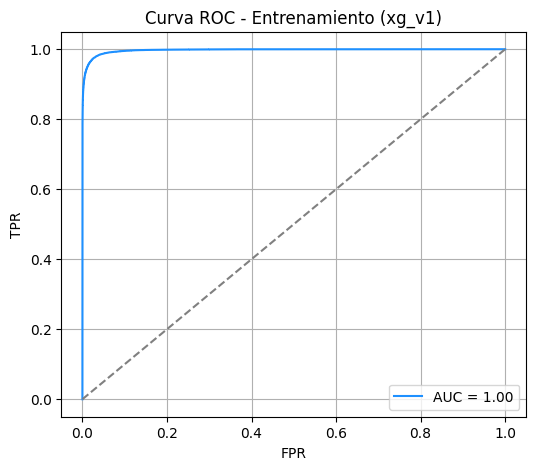

=== Matriz de Confusión - Entrenamiento (xg_v1) ===
Verdaderos Negativos (No Fraude bien clasificado): 19,485,427
Falsos Positivos (No Fraude mal clasificado como Fraude): 234
Falsos Negativos (Fraude no detectado): 8,546
Verdaderos Positivos (Fraude bien detectado): 15,260


In [9]:
# =============================
# SECCIÓN 1: ENTRENAMIENTO (xg_v1)
# =============================
y_train_proba_xg_v1 = model_boost.predict(dtrain)
y_train_pred_xg_v1 = (y_train_proba_xg_v1 >= 0.5).astype(int)

print("\n=== Classification Report - Entrenamiento (xg_v1) ===")
print(classification_report(y_train_boost, y_train_pred_xg_v1))

fpr_train_xg_v1, tpr_train_xg_v1, _ = roc_curve(y_train_boost, y_train_proba_xg_v1)
roc_auc_train_xg_v1 = auc(fpr_train_xg_v1, tpr_train_xg_v1)

plt.figure(figsize=(6, 5))
plt.plot(fpr_train_xg_v1, tpr_train_xg_v1, label=f"AUC = {roc_auc_train_xg_v1:.2f}", color="dodgerblue")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("Curva ROC - Entrenamiento (xg_v1)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

cm_train_xg_v1 = confusion_matrix(y_train_boost, y_train_pred_xg_v1)
tn, fp, fn, tp = cm_train_xg_v1.ravel()
print("=== Matriz de Confusión - Entrenamiento (xg_v1) ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn:,}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp:,}")
print(f"Falsos Negativos (Fraude no detectado): {fn:,}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp:,}")


=== Classification Report - Test (xg_v1) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4871416
           1       0.98      0.61      0.75      5951

    accuracy                           1.00   4877367
   macro avg       0.99      0.80      0.87   4877367
weighted avg       1.00      1.00      1.00   4877367



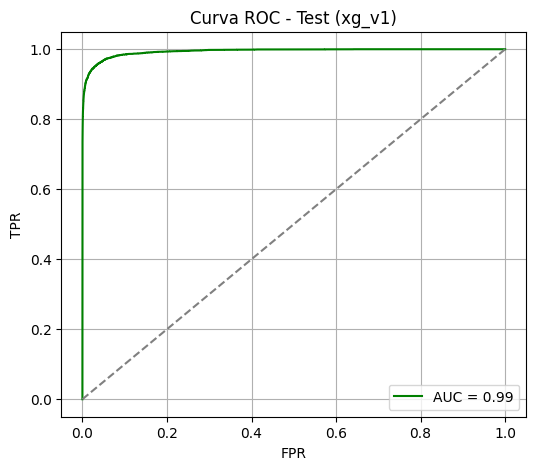

=== Matriz de Confusión - Test (xg_v1) ===
Verdaderos Negativos (No Fraude bien clasificado): 4,871,330
Falsos Positivos (No Fraude mal clasificado como Fraude): 86
Falsos Negativos (Fraude no detectado): 2,334
Verdaderos Positivos (Fraude bien detectado): 3,617


In [10]:
# =============================
# SECCIÓN 2: TEST (xg_v1)
# =============================
y_test_proba_xg_v1 = model_boost.predict(dtest)
y_test_pred_xg_v1 = (y_test_proba_xg_v1 >= 0.5).astype(int)

print("\n=== Classification Report - Test (xg_v1) ===")
print(classification_report(y_test_boost, y_test_pred_xg_v1))

fpr_test_xg_v1, tpr_test_xg_v1, _ = roc_curve(y_test_boost, y_test_proba_xg_v1)
roc_auc_test_xg_v1 = auc(fpr_test_xg_v1, tpr_test_xg_v1)

plt.figure(figsize=(6, 5))
plt.plot(fpr_test_xg_v1, tpr_test_xg_v1, label=f"AUC = {roc_auc_test_xg_v1:.2f}", color="green")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("Curva ROC - Test (xg_v1)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

cm_test_xg_v1 = confusion_matrix(y_test_boost, y_test_pred_xg_v1)
tn, fp, fn, tp = cm_test_xg_v1.ravel()
print("=== Matriz de Confusión - Test (xg_v1) ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn:,}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp:,}")
print(f"Falsos Negativos (Fraude no detectado): {fn:,}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp:,}")


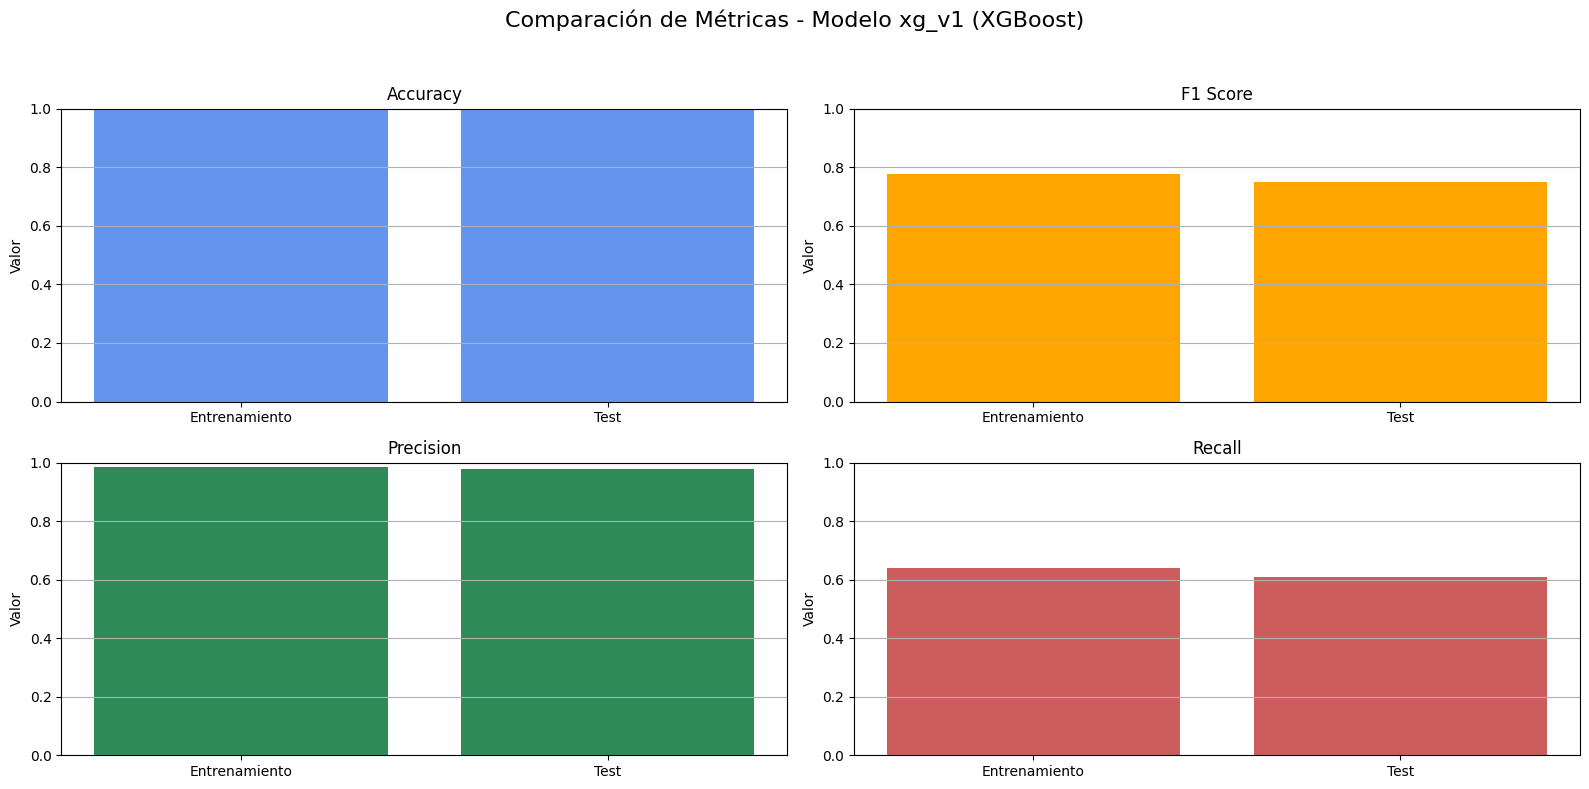

In [11]:
# =============================
# SECCIÓN 3: COMPARACIÓN DE MÉTRICAS
# =============================
labels_xg_v1 = ["Entrenamiento", "Test"]

accuracy_xg_v1 = [
    accuracy_score(y_train_boost, y_train_pred_xg_v1),
    accuracy_score(y_test_boost, y_test_pred_xg_v1)
]

f1_xg_v1 = [
    f1_score(y_train_boost, y_train_pred_xg_v1),
    f1_score(y_test_boost, y_test_pred_xg_v1)
]

precision_xg_v1 = [
    precision_score(y_train_boost, y_train_pred_xg_v1),
    precision_score(y_test_boost, y_test_pred_xg_v1)
]

recall_xg_v1 = [
    recall_score(y_train_boost, y_train_pred_xg_v1),
    recall_score(y_test_boost, y_test_pred_xg_v1)
]

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.bar(labels_xg_v1, accuracy_xg_v1, color='cornflowerblue')
plt.ylim(0, 1)
plt.title("Accuracy")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 2)
plt.bar(labels_xg_v1, f1_xg_v1, color='orange')
plt.ylim(0, 1)
plt.title("F1 Score")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 3)
plt.bar(labels_xg_v1, precision_xg_v1, color='seagreen')
plt.ylim(0, 1)
plt.title("Precision")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 4)
plt.bar(labels_xg_v1, recall_xg_v1, color='indianred')
plt.ylim(0, 1)
plt.title("Recall")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.suptitle("Comparación de Métricas - Modelo xg_v1 (XGBoost)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

En entrenamiento, el modelo xg_v1 se comporta muy bien. Tiene un f1-score de 0.78 para la clase de fraude, con una precisión de 0.98 y un recall de 0.64. Si bien no alcanza métricas perfectas, logra un buen equilibrio entre ambas. El AUC es de 1.00 y, según la matriz de confusión, detecta más de 15 mil fraudes, aunque se le escapan algo más de 8 mil.

En prueba, mantiene el nivel. El recall en fraude sube ligeramente a 0.61 y la precisión sigue en 0.98. El f1-score queda en 0.75, y el AUC se mantiene alto, en 0.99. En la matriz de confusión se ven 3,617 fraudes bien detectados, con solo 86 falsos positivos y 2,334 que se le escaparon.

Comparando con las versiones de Random Forest, rf_v1 fue muy preciso pero demasiado conservador. Tenía un recall de apenas 0.38, así que dejaba pasar la mayoría de los fraudes. rf_v2 mejoró bastante usando SMOTE, alcanzando un recall de 0.59 y un f1-score de 0.70, con muy pocos falsos positivos. Luego, rf_v3, con ajuste de hiperparámetros, subió el recall a 0.62, pero perdió bastante precisión y su f1-score bajó a 0.53, además de generar muchos más falsos positivos.

Comparando todo, xg_v1 es el modelo que mejor rinde. Tiene una muy buena detección de fraudes, mantiene una alta precisión y logra un balance general más sólido que las otras versiones. También se nota más estable entre entrenamiento y prueba. Por ahora, es claramente la mejor opción.

### VERSION 2 - XGBoost

Para la versión 2 del modelo con XGBoost se ajustan varios parámetros pensando en mejorar el recall y manejar mejor el desbalance de clases. Se usa la métrica aucpr, que es más útil en este tipo de problemas donde hay muchos más no fraudes que fraudes. El learning_rate se baja a 0.05 para que el aprendizaje sea más suave y se reduzca el riesgo de sobreajuste.

También se reduce la profundidad de los árboles a 4 (max_depth=4), lo que ayuda a simplificar el modelo y hacerlo menos propenso a memorizar el entrenamiento. Se mantienen las técnicas de muestreo por fila y por columna (subsample=0.8 y colsample_bytree=0.8) para agregar variabilidad. Además, se agrega scale_pos_weight=10 para darle más peso a la clase minoritaria durante el entrenamiento.

El modelo se entrena usando xgb.train con la cantidad óptima de rondas encontradas anteriormente (best_rounds) y se guardan los resultados de evaluación en evals_result_v2 por si se quiere analizarlos después.

In [ ]:
params_v2_boost = {
    "objective": "binary:logistic",
    "eval_metric": "aucpr",
    "tree_method": "hist",
    "learning_rate": 0.05,
    "max_depth": 4,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "scale_pos_weight": 10
}

evals_result_v2 = {}
model_boost_v2 = xgb.train(
    params_v2_boost,
    dtrain,
    num_boost_round=best_rounds,
    evals_result=evals_result_v2
)

Una vez entrenado el modelo xg_v2, se generan las predicciones de probabilidad sobre el conjunto de prueba. Estas probabilidades luego se convierten en clases binarias usando un umbral de 0.5: si la probabilidad de fraude es mayor a ese valor, se clasifica como fraude; si no, como no fraude.

Con esas predicciones finales se genera el classification_report, que resume las métricas principales: precisión, recall y f1-score para ambas clases. Esto permite evaluar cómo se está comportando el modelo específicamente en la detección de fraudes, comparado con su capacidad para no equivocarse con las transacciones legítimas. Finalmente, se imprime el resultado para su análisis.

In [15]:
# Hacer predicciones de probabilidad
y_pred_proba_boost_v2 = model_boost_v2.predict(dtest)

# Convertir probabilidades en clases binarias (umbral 0.5)
y_pred_boost_v2 = (y_pred_proba_boost_v2 > 0.5).astype(int)

# Generar el classification report
report_xgb_v2 = classification_report(y_test_boost, y_pred_boost_v2, target_names=["No Fraude", "Fraude"])

# Imprimir el reporte
print("=== XGBoost Classification Report ===")
print(report_xgb_v2)

=== XGBoost Classification Report ===
              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00   4871416
      Fraude       0.81      0.54      0.65      5951

    accuracy                           1.00   4877367
   macro avg       0.91      0.77      0.82   4877367
weighted avg       1.00      1.00      1.00   4877367



In [ ]:
####################### DESCOMENTAR EN CASO DE SOBRECARGA DE MEMORIA

# Si lo cargas desde el archivo
#model_boost_v2 = joblib.load("t_modelo_xgboost_cv_v2.joblib")

Ahora obtenemos las métricas para el modelo version 2


=== Classification Report - Entrenamiento (xg_v2) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00  19485661
           1       0.83      0.57      0.68     23806

    accuracy                           1.00  19509467
   macro avg       0.91      0.79      0.84  19509467
weighted avg       1.00      1.00      1.00  19509467



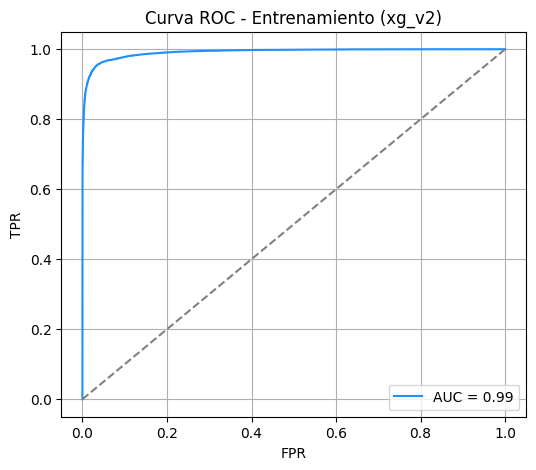

=== Matriz de Confusión - Entrenamiento (xg_v2) ===
Verdaderos Negativos (No Fraude bien clasificado): 19,482,795
Falsos Positivos (No Fraude mal clasificado como Fraude): 2,866
Falsos Negativos (Fraude no detectado): 10,143
Verdaderos Positivos (Fraude bien detectado): 13,663


In [13]:
# =============================
# SECCIÓN 1: ENTRENAMIENTO (xg_v2)
# =============================
y_train_proba_xg_v2 = model_boost_v2.predict(dtrain)
y_train_pred_xg_v2 = (y_train_proba_xg_v2 >= 0.5).astype(int)

print("\n=== Classification Report - Entrenamiento (xg_v2) ===")
print(classification_report(y_train_boost, y_train_pred_xg_v2))

fpr_train_xg_v2, tpr_train_xg_v2, _ = roc_curve(y_train_boost, y_train_proba_xg_v2)
roc_auc_train_xg_v2 = auc(fpr_train_xg_v2, tpr_train_xg_v2)

plt.figure(figsize=(6, 5))
plt.plot(fpr_train_xg_v2, tpr_train_xg_v2, label=f"AUC = {roc_auc_train_xg_v2:.2f}", color="dodgerblue")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("Curva ROC - Entrenamiento (xg_v2)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

cm_train_xg_v2 = confusion_matrix(y_train_boost, y_train_pred_xg_v2)
tn, fp, fn, tp = cm_train_xg_v2.ravel()
print("=== Matriz de Confusión - Entrenamiento (xg_v2) ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn:,}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp:,}")
print(f"Falsos Negativos (Fraude no detectado): {fn:,}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp:,}")


=== Classification Report - Test (xg_v2) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4871416
           1       0.81      0.54      0.65      5951

    accuracy                           1.00   4877367
   macro avg       0.91      0.77      0.82   4877367
weighted avg       1.00      1.00      1.00   4877367



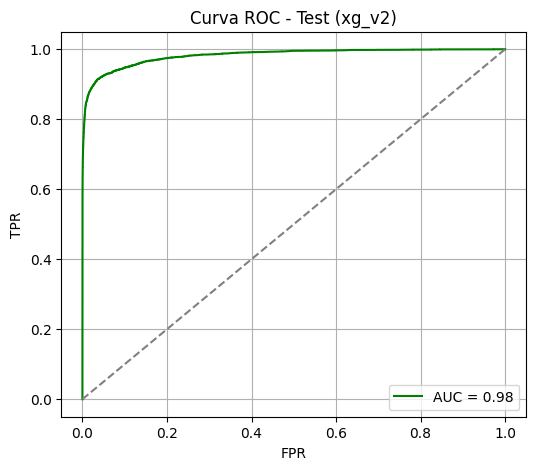

=== Matriz de Confusión - Test (xg_v2) ===
Verdaderos Negativos (No Fraude bien clasificado): 4,870,672
Falsos Positivos (No Fraude mal clasificado como Fraude): 744
Falsos Negativos (Fraude no detectado): 2,743
Verdaderos Positivos (Fraude bien detectado): 3,208


In [14]:
y_test_proba_xg_v2 = model_boost_v2.predict(dtest)
y_test_pred_xg_v2 = (y_test_proba_xg_v2 >= 0.5).astype(int)

print("\n=== Classification Report - Test (xg_v2) ===")
print(classification_report(y_test_boost, y_test_pred_xg_v2))

fpr_test_xg_v2, tpr_test_xg_v2, _ = roc_curve(y_test_boost, y_test_proba_xg_v2)
roc_auc_test_xg_v2 = auc(fpr_test_xg_v2, tpr_test_xg_v2)

plt.figure(figsize=(6, 5))
plt.plot(fpr_test_xg_v2, tpr_test_xg_v2, label=f"AUC = {roc_auc_test_xg_v2:.2f}", color="green")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("Curva ROC - Test (xg_v2)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

cm_test_xg_v2 = confusion_matrix(y_test_boost, y_test_pred_xg_v2)
tn, fp, fn, tp = cm_test_xg_v2.ravel()
print("=== Matriz de Confusión - Test (xg_v2) ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn:,}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp:,}")
print(f"Falsos Negativos (Fraude no detectado): {fn:,}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp:,}")

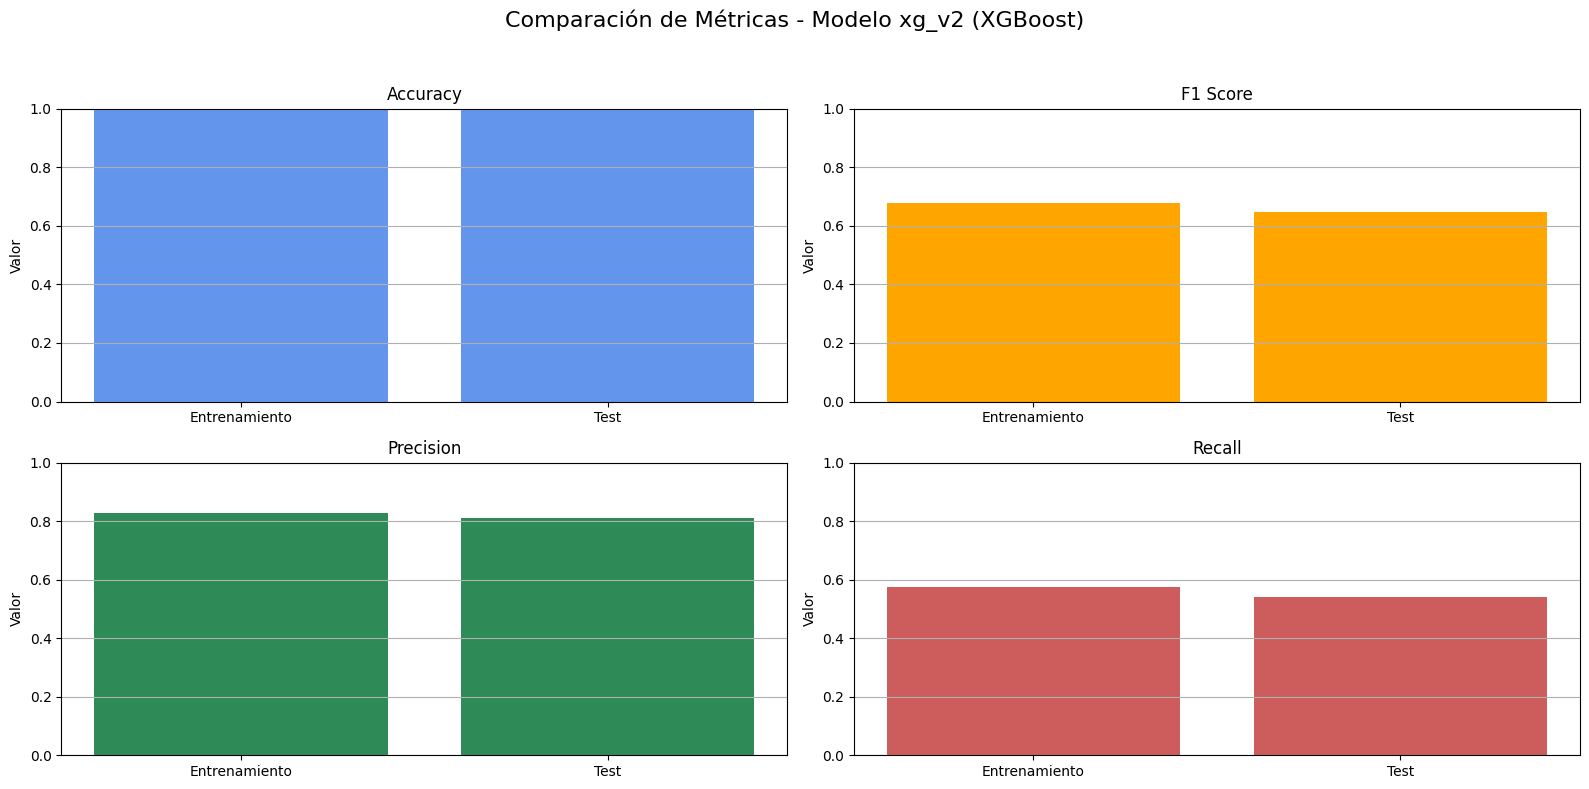

In [15]:
labels_xg_v2 = ["Entrenamiento", "Test"]

accuracy_xg_v2 = [
    accuracy_score(y_train_boost, y_train_pred_xg_v2),
    accuracy_score(y_test_boost, y_test_pred_xg_v2)
]

f1_xg_v2 = [
    f1_score(y_train_boost, y_train_pred_xg_v2),
    f1_score(y_test_boost, y_test_pred_xg_v2)
]

precision_xg_v2 = [
    precision_score(y_train_boost, y_train_pred_xg_v2),
    precision_score(y_test_boost, y_test_pred_xg_v2)
]

recall_xg_v2 = [
    recall_score(y_train_boost, y_train_pred_xg_v2),
    recall_score(y_test_boost, y_test_pred_xg_v2)
]

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.bar(labels_xg_v2, accuracy_xg_v2, color='cornflowerblue')
plt.ylim(0, 1)
plt.title("Accuracy")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 2)
plt.bar(labels_xg_v2, f1_xg_v2, color='orange')
plt.ylim(0, 1)
plt.title("F1 Score")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 3)
plt.bar(labels_xg_v2, precision_xg_v2, color='seagreen')
plt.ylim(0, 1)
plt.title("Precision")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 4)
plt.bar(labels_xg_v2, recall_xg_v2, color='indianred')
plt.ylim(0, 1)
plt.title("Recall")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.suptitle("Comparación de Métricas - Modelo xg_v2 (XGBoost)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# Guardar el modelo entrenado
joblib.dump(model_boost_v2, "t_modelo_xgboost_cv_v2.joblib")

En esta segunda versión del modelo XGBoost, se nota un ajuste que busca mejorar el recall sin sacrificar demasiado la precisión. En entrenamiento, el f1-score baja a 0.68 para la clase de fraude, con un recall de 0.57 y una precisión de 0.83. El modelo deja pasar más fraudes que en la versión 1, pero también comete más falsos positivos. En la matriz de confusión se ven más de 10 mil fraudes no detectados y casi 2,900 transacciones legítimas clasificadas incorrectamente como fraude.

En el conjunto de prueba, los resultados se mantienen bastante consistentes. El recall baja un poco más y queda en 0.54, mientras que la precisión queda en 0.81. El f1-score termina en 0.65. La matriz de confusión muestra que se detectaron 3,288 fraudes y se escaparon 2,743, con 744 falsos positivos. El AUC es de 0.98, lo que sigue siendo alto, aunque levemente inferior al de la versión anterior.

Visto en conjunto, este modelo xg_v2 es más agresivo que la versión 1 a la hora de detectar fraudes, pero a cambio aumenta la cantidad de errores en transacciones legítimas. El gráfico comparativo lo refleja bien: la precisión baja un poco, el recall también, y el f1-score desciende en relación a xg_v1. A pesar de que los ajustes fueron pensados para mejorar el recall, en la práctica no superó a la primera versión, que sigue siendo más balanceada y estable entre entrenamiento y prueba.

### VERSION 3 - XGBoost

En la versión 3 del modelo XGBoost se incorpora SMOTE antes del entrenamiento para generar ejemplos sintéticos de la clase minoritaria. Como SMOTE solo acepta datos numéricos, primero se convierten las variables categóricas a códigos numéricos temporales usando .cat.codes.

Una vez transformado el conjunto, se aplica SMOTE con una proporción del 5% (sampling_strategy=0.05). Esto permite balancear el conjunto de entrenamiento sin alterar el de prueba. Luego, se reconstruye el DataFrame resultante y se vuelven a convertir las columnas categóricas al tipo category para que XGBoost pueda interpretarlas correctamente con enable_categorical=True.

Finalmente, se crea el DMatrix con los datos aumentados (dtrain) y también el conjunto de prueba (dtest) para mantener la misma evaluación que en versiones anteriores. Con esto, el modelo queda listo para ser entrenado sobre un conjunto balanceado y ya convertido al formato adecuado para XGBoost.

In [6]:
# Aplicar SMOTE ANTES de crear dtrain
smote_xg_v3 = SMOTE(sampling_strategy=0.05, random_state=42)

# Convertir categóricas a códigos numéricos temporales para aplicar SMOTE
X_train_smote_xg = X_train_boost.copy()
for col in categorical_features_boost:
    X_train_smote_xg[col] = X_train_smote_xg[col].cat.codes  # SMOTE solo acepta numéricos

# Aplicar SMOTE
X_resampled_xg_v3, y_resampled_xg_v3 = smote_xg_v3.fit_resample(X_train_smote_xg, y_train_boost)

# Convertir a DMatrix (volver a categorizar las columnas si querés usar enable_categorical=True)
X_resampled_xg_v3 = pd.DataFrame(X_resampled_xg_v3, columns=X_train_smote_xg.columns)
for col in categorical_features_boost:
    X_resampled_xg_v3[col] = X_resampled_xg_v3[col].astype('category')

# Crear DMatrix con los datos aumentados
dtrain = xgb.DMatrix(X_resampled_xg_v3, label=y_resampled_xg_v3, enable_categorical=True)
dtest = xgb.DMatrix(X_test_boost, label=y_test_boost, enable_categorical=True)

En esta tercera versión del modelo XGBoost se utilizan parámetros más conservadores para tratar de reducir el sobreajuste y mejorar la generalización. Se baja la tasa de aprendizaje (learning_rate=0.05) y se limitan la profundidad de los árboles (max_depth=4) para evitar que el modelo se vuelva demasiado complejo.

Además, se agregan restricciones como min_child_weight=10 y gamma=1 para que los árboles solo se dividan si realmente hay ganancia en la partición. También se reduce la cantidad de filas y columnas utilizadas en cada árbol (subsample=0.6 y colsample_bytree=0.6), y se aplica regularización tanto L1 como L2 para controlar el ajuste del modelo (reg_alpha=0.5, reg_lambda=1.0).

Con estos parámetros definidos, se realiza validación cruzada con 5 particiones para encontrar el número óptimo de rondas de boosting, aplicando early_stopping por si el modelo deja de mejorar. Al final, se guarda la cantidad de iteraciones en best_rounds para usarla luego en el entrenamiento final.

In [ ]:
# Definir parámetros del modelo
params_xg_v3 = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "tree_method": "hist",
    "learning_rate": 0.05,       
    "max_depth": 4,              
    "min_child_weight": 10,      
    "gamma": 1,                  
    "subsample": 0.6,            
    "colsample_bytree": 0.6,     
    "reg_alpha": 0.5,            
    "reg_lambda": 1.0,           
    "random_state": 42
}

# Validación cruzada
cv_results_xg_smote = xgb.cv(
    params=params_xg_v3,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=5,
    early_stopping_rounds=20,
    seed=42,
    verbose_eval=True
)

# Entrenamiento final
best_rounds = len(cv_results_xg_smote)




[0]	train-logloss:0.22692+0.00005	test-logloss:0.22692+0.00015
[1]	train-logloss:0.22100+0.00007	test-logloss:0.22100+0.00014
[2]	train-logloss:0.21052+0.00007	test-logloss:0.21053+0.00015
[3]	train-logloss:0.20125+0.00007	test-logloss:0.20127+0.00014
[4]	train-logloss:0.19303+0.00006	test-logloss:0.19305+0.00014
[5]	train-logloss:0.18438+0.00007	test-logloss:0.18440+0.00013
[6]	train-logloss:0.17802+0.00007	test-logloss:0.17803+0.00014
[7]	train-logloss:0.17287+0.00007	test-logloss:0.17289+0.00014
[8]	train-logloss:0.16737+0.00006	test-logloss:0.16739+0.00013
[9]	train-logloss:0.16409+0.00006	test-logloss:0.16411+0.00014
[10]	train-logloss:0.15929+0.00007	test-logloss:0.15930+0.00014
[11]	train-logloss:0.15326+0.00006	test-logloss:0.15328+0.00013
[12]	train-logloss:0.14811+0.00006	test-logloss:0.14813+0.00013
[13]	train-logloss:0.14307+0.00012	test-logloss:0.14309+0.00017
[14]	train-logloss:0.13932+0.00022	test-logloss:0.13935+0.00016
[15]	train-logloss:0.13567+0.00022	test-logloss:0.

Con los mejores parámetros ya definidos y el número óptimo de iteraciones calculado a partir de la validación cruzada, se entrena el modelo final final_xgboost_model_cv. Este entrenamiento se hace sobre el conjunto aumentado con SMOTE (dtrain) y se limita a la cantidad exacta de rondas que dio mejor resultado (best_rounds). De esta forma, se entrena un modelo más robusto, aprovechando tanto el rebalanceo de clases como la regularización y los ajustes finos en los hiperparámetros.

In [9]:
final_xgboost_model_cv = xgb.train(
    params_xg_v3,
    dtrain,
    num_boost_round=best_rounds
)

In [ ]:
####################### DESCOMENTAR EN CASO DE SOBRECARGA DE MEMORIA

#Cargar el modelo previamente guardado
#final_xgboost_model_cv = joblib.load("t_modelo_XGBOOST_v3.pkl")

Ahora, finalmente, vemos las métricas para esta última versión


=== Classification Report - Entrenamiento (xg_v3) ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99  19485661
           1       0.97      0.82      0.89    974283

    accuracy                           0.99  20459944
   macro avg       0.98      0.91      0.94  20459944
weighted avg       0.99      0.99      0.99  20459944



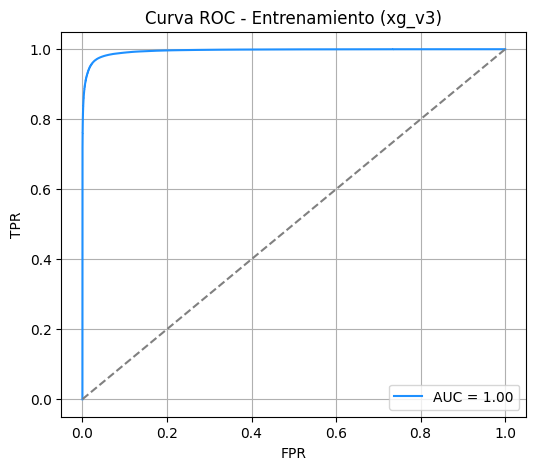

In [19]:
y_train_proba_xg_v3 = final_xgboost_model_cv.predict(dtrain)
y_train_pred_xg_v3 = (y_train_proba_xg_v3 >= 0.5).astype(int)

print("\n=== Classification Report - Entrenamiento (xg_v3) ===")
print(classification_report(y_resampled_xg_v3, y_train_pred_xg_v3))

fpr_train_xg_v3, tpr_train_xg_v3, _ = roc_curve(y_resampled_xg_v3, y_train_proba_xg_v3)
roc_auc_train_xg_v3 = auc(fpr_train_xg_v3, tpr_train_xg_v3)

plt.figure(figsize=(6, 5))
plt.plot(fpr_train_xg_v3, tpr_train_xg_v3, label=f"AUC = {roc_auc_train_xg_v3:.2f}", color="dodgerblue")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("Curva ROC - Entrenamiento (xg_v3)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()


=== Classification Report - Test (xg_v3) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4871416
           1       0.30      0.48      0.37      5951

    accuracy                           1.00   4877367
   macro avg       0.65      0.74      0.69   4877367
weighted avg       1.00      1.00      1.00   4877367



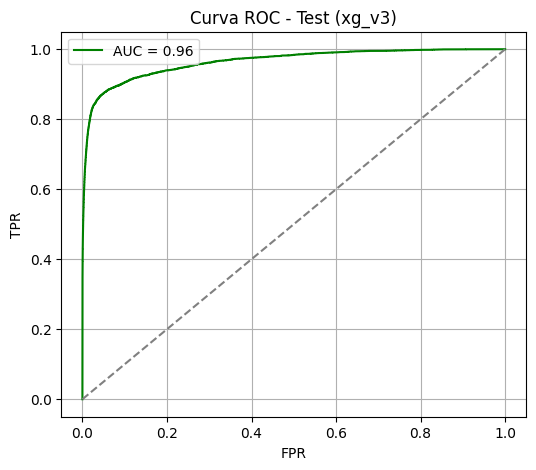

=== Matriz de Confusión - Test (xg_v3) ===
Verdaderos Negativos (No Fraude bien clasificado): 4,864,944
Falsos Positivos (No Fraude mal clasificado como Fraude): 6,472
Falsos Negativos (Fraude no detectado): 3,119
Verdaderos Positivos (Fraude bien detectado): 2,832


In [20]:
y_test_proba_xg_v3 = final_xgboost_model_cv.predict(dtest)
y_test_pred_xg_v3 = (y_test_proba_xg_v3 >= 0.5).astype(int)

print("\n=== Classification Report - Test (xg_v3) ===")
print(classification_report(y_test_boost, y_test_pred_xg_v3))

fpr_test_xg_v3, tpr_test_xg_v3, _ = roc_curve(y_test_boost, y_test_proba_xg_v3)
roc_auc_test_xg_v3 = auc(fpr_test_xg_v3, tpr_test_xg_v3)

plt.figure(figsize=(6, 5))
plt.plot(fpr_test_xg_v3, tpr_test_xg_v3, label=f"AUC = {roc_auc_test_xg_v3:.2f}", color="green")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("Curva ROC - Test (xg_v3)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

cm_test_xg_v3 = confusion_matrix(y_test_boost, y_test_pred_xg_v3)
tn, fp, fn, tp = cm_test_xg_v3.ravel()
print("=== Matriz de Confusión - Test (xg_v3) ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn:,}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp:,}")
print(f"Falsos Negativos (Fraude no detectado): {fn:,}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp:,}")

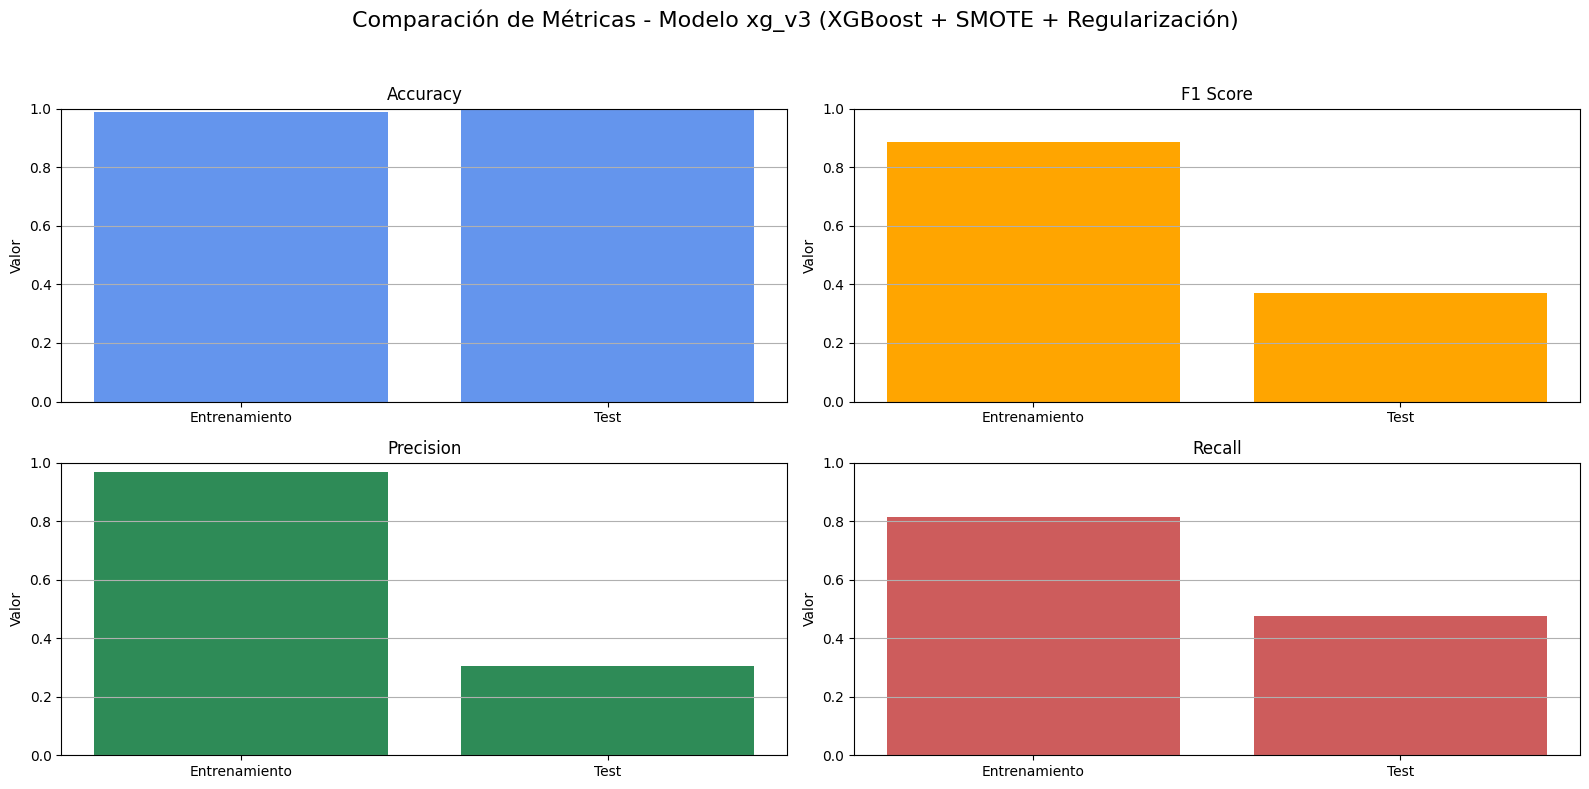

In [21]:
labels_xg_v3 = ["Entrenamiento", "Test"]

accuracy_xg_v3 = [
    accuracy_score(y_resampled_xg_v3, y_train_pred_xg_v3),
    accuracy_score(y_test_boost, y_test_pred_xg_v3)
]

f1_xg_v3 = [
    f1_score(y_resampled_xg_v3, y_train_pred_xg_v3),
    f1_score(y_test_boost, y_test_pred_xg_v3)
]

precision_xg_v3 = [
    precision_score(y_resampled_xg_v3, y_train_pred_xg_v3),
    precision_score(y_test_boost, y_test_pred_xg_v3)
]

recall_xg_v3 = [
    recall_score(y_resampled_xg_v3, y_train_pred_xg_v3),
    recall_score(y_test_boost, y_test_pred_xg_v3)
]

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.bar(labels_xg_v3, accuracy_xg_v3, color='cornflowerblue')
plt.ylim(0, 1)
plt.title("Accuracy")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 2)
plt.bar(labels_xg_v3, f1_xg_v3, color='orange')
plt.ylim(0, 1)
plt.title("F1 Score")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 3)
plt.bar(labels_xg_v3, precision_xg_v3, color='seagreen')
plt.ylim(0, 1)
plt.title("Precision")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.subplot(2, 2, 4)
plt.bar(labels_xg_v3, recall_xg_v3, color='indianred')
plt.ylim(0, 1)
plt.title("Recall")
plt.ylabel("Valor")
plt.grid(axis='y')

plt.suptitle("Comparación de Métricas - Modelo xg_v3 (XGBoost + SMOTE + Regularización)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

En esta tercera versión del modelo XGBoost, el entrenamiento muestra un rendimiento muy alto. El f1-score alcanza 0.89 para la clase de fraude, con un recall de 0.82 y una precisión de 0.97. El AUC es de 1.00, y todo indica que el modelo aprendió muy bien del conjunto aumentado con SMOTE. En ese contexto, el balance entre detección y exactitud es muy bueno, al menos dentro del entrenamiento.

En prueba, sin embargo, el panorama cambia bastante. El recall baja a 0.48 y la precisión cae a 0.30, dejando el f1-score en 0.37 para la clase de fraude. El modelo empieza a generar muchos más falsos positivos, y también deja pasar más fraudes de los deseados. La matriz de confusión refleja esto con claridad: más de 6,400 transacciones legítimas fueron clasificadas incorrectamente como fraude, y más de 3,000 fraudes no fueron detectados.

El AUC baja a 0.96, que sigue siendo un valor alto, pero inferior al que mostraban las versiones anteriores. Esto, junto con la caída en las métricas de clasificación, indica que el modelo perdió parte de su capacidad de generalización, posiblemente por el uso más agresivo de SMOTE combinado con regularización fuerte.

In [13]:
# Guardar el modelo Random Forest completo
joblib.dump(final_xgboost_model_cv, 't_modelo_XGBOOST_v3.pkl')

print("Modelo guardado como 't_modelo_XGBOOST_v3.pkl'")

Modelo guardado como 't_modelo_XGBOOST_v3.pkl'


Ahora obtenemos las columnas mas importantes

### GRAFICAMOS LA IMPORTANCIA DE LAS COLUMNAS PARA XGBOOST

En esta ocasión, la versión 1 parece ser la mejor de XGBoost. Entonces graficamos la importancia de las columnas.

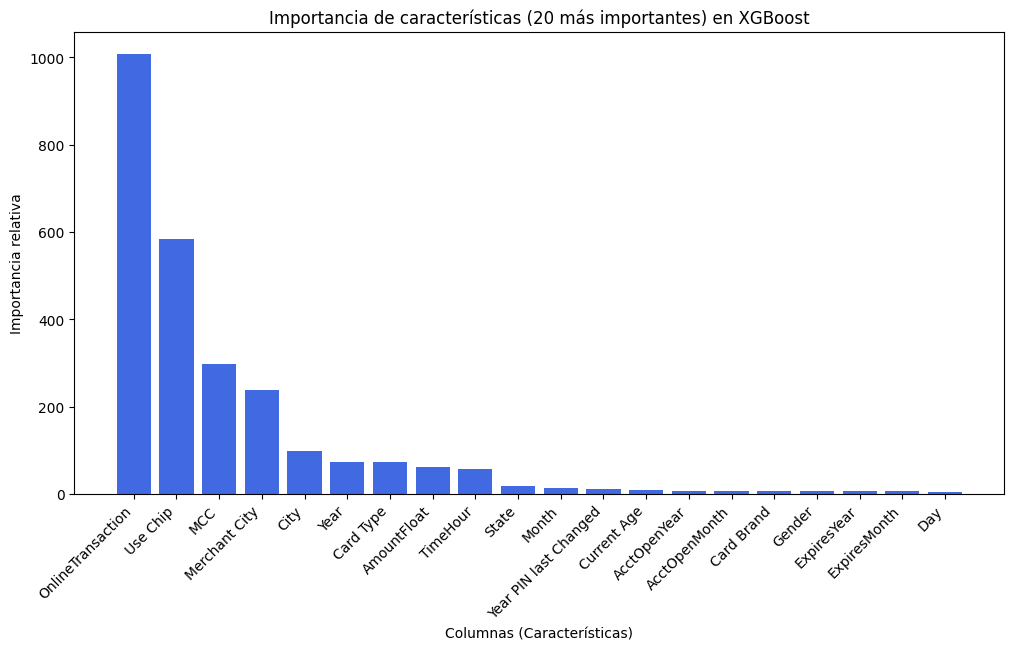

In [9]:
# Obtener la importancia de características usando 'gain' (puedes cambiar a 'weight' o 'cover')
feature_importance = model_boost.get_score(importance_type="gain")

# Convertir a DataFrame para ordenarlo y visualizarlo
importance_df = pd.DataFrame(list(feature_importance.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Graficar la importancia de características
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Columnas (Características)')
plt.ylabel('Importancia relativa')
plt.title('Importancia de características (20 más importantes) en XGBoost')
plt.xticks(rotation=45, ha='right') 
plt.show()

# COMPARACION RESULTADOS (PARA EL DOCUMENTO)

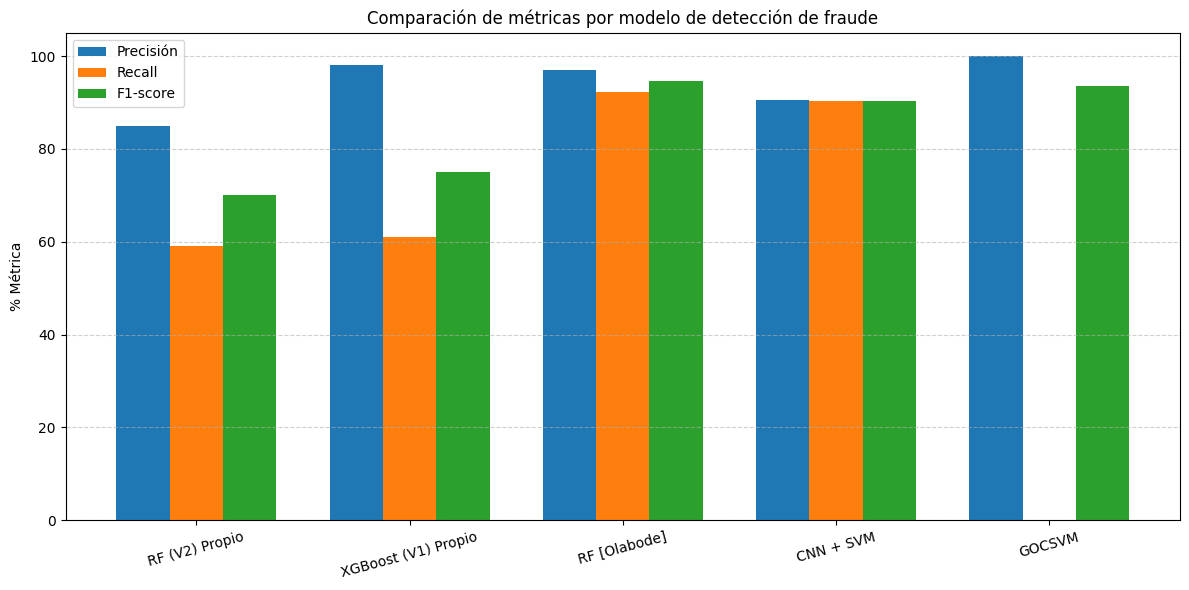

In [12]:
# Nombres de los modelos (acortados para visualización)
modelos = [
    "RF (V2) Propio",
    "XGBoost (V1) Propio",
    "RF [Olabode]",
    "CNN + SVM",
    "GOCSVM"
]

# Métricas principales en porcentaje
precision = [85, 98, 96.94, 90.50, 100]
recall = [59, 61, 92.23, 90.34, None]  # GOCSVM no reportó Recall
f1_score = [70, 75, 94.53, 90.41, 93.60]

# Reemplazamos None por 0 para que matplotlib lo grafique como barra visible (opcional)
recall_clean = [r if r is not None else 0 for r in recall]

# Posiciones para las barras
x = np.arange(len(modelos))
width = 0.25

# Crear figura
fig, ax = plt.subplots(figsize=(12, 6))

# Dibujar barras agrupadas
ax.bar(x - width, precision, width, label='Precisión')
ax.bar(x, recall_clean, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-score')

# Personalización
ax.set_ylabel('% Métrica')
ax.set_title('Comparación de métricas por modelo de detección de fraude')
ax.set_xticks(x)
ax.set_xticklabels(modelos, rotation=15)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.tight_layout()
plt.show()